# Dicionario de dados (atualizar depois)

---

1. **latitude**: Coordenada geográfica indicando a posição norte-sul do foco de incêndio.
2. **longitude**: Coordenada geográfica indicando a posição leste-oeste do foco de incêndio.
3. **data_pas**: Data e hora da passagem do satélite que capturou o foco de incêndio.
4. **satelite**: Nome do satélite responsável pela captura dos dados (ex: TERRA_M-M, NPP-375D).
5. **pais**: Nome do país onde o foco de incêndio foi detectado (ex: Brasil).
6. **estado**: Unidade federativa dentro do país onde ocorreu o foco de incêndio.
7. **municipio**: Cidade ou localidade específica onde ocorreu o foco de incêndio.
8. **bioma**: Tipo de ecossistema onde ocorreu o foco de incêndio (ex: Amazônia, Cerrado, Caatinga).
9. **numero_dias_sem_chuva**: Quantidade de dias desde a última chuva significativa no local do foco.
10. **precipitacao**: Quantidade de chuva registrada na área do foco de incêndio, geralmente medida em milímetros (mm).
11. **risco_fogo**: Índice que representa o risco de incêndios na região, podendo variar de 0 a 1 (onde 1 indica risco máximo).
12. **frp**: "Fire Radiative Power" (Potência Radiativa do Fogo), que indica a energia liberada pelo incêndio, geralmente em megawatts (MW).

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
# Importa o módulo
import gdown

# ID do arquivo do Google Drive
file_id = "13XNdCjcECxEwsDGO7hTsN_w6r-ghHuw8"

# Faz o download e salva como um arquivo CSV
gdown.download(f"https://drive.google.com/uc?id={file_id}", output="dados.csv", quiet=False)

# Carrega o CSV com pandas
import pandas as pd

df = pd.read_csv("dados.csv")
df.head()  # Mostra as primeiras linhas


Downloading...
From: https://drive.google.com/uc?id=13XNdCjcECxEwsDGO7hTsN_w6r-ghHuw8
To: /content/dados.csv
100%|██████████| 28.8M/28.8M [00:00<00:00, 179MB/s]


latitude  longitude             data_pas   satelite               estado  \
0  -7.36323  -39.94515  2024-01-02 04:08:00   NPP-375D           PERNAMBUCO   
1  -3.51178  -40.13655  2024-01-02 04:06:00   NPP-375D                CEARÁ   
2  -5.47699  -36.43069  2024-01-02 12:48:00  TERRA_M-T  RIO GRANDE DO NORTE   
3  -4.55109  -38.23961  2024-01-02 12:48:00  TERRA_M-T                CEARÁ   
4  -6.05349  -39.49822  2024-01-02 12:48:00  TERRA_M-T                CEARÁ   

           municipio  numero_dias_sem_chuva  precipitacao  risco_fogo   frp  
0             BODOCÓ                      7          1.32        0.54   2.1  
1  SANTANA DO ACARAÚ                      3          3.38        0.00   1.0  
2      PEDRO AVELINO                      2          0.75        0.11  33.8  
3           BEBERIBE                      4         13.19        0.00  55.6  
4           ACOPIARA                      0          0.00        0.02  12.2

# Limpeza dos dados

In [ ]:
df['numero_dias_sem_chuva'] = df['numero_dias_sem_chuva'].astype('uint8')
df['precipitacao'] = df['precipitacao'].astype('float32')
df['risco_fogo'] = df['risco_fogo'].astype('float32')
df['frp'] = df['frp'].astype('float32')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346785 entries, 0 to 346784
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   latitude               346785 non-null  float64
 1   longitude              346785 non-null  float64
 2   data_pas               346785 non-null  object 
 3   satelite               346785 non-null  object 
 4   estado                 346785 non-null  object 
 5   municipio              346785 non-null  object 
 6   numero_dias_sem_chuva  346785 non-null  uint8  
 7   precipitacao           346785 non-null  float32
 8   risco_fogo             346785 non-null  float32
 9   frp                    346785 non-null  float32
dtypes: float32(3), float64(2), object(4), uint8(1)
memory usage: 20.2+ MB


In [ ]:
colunas_categoricas = ['estado', 'municipio', 'satelite']

for col in colunas_categoricas:
    df[col] = df[col].astype('category')

df['data_pas'] = pd.to_datetime(df['data_pas'], errors='coerce')

df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346785 entries, 0 to 346784
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   latitude               346785 non-null  float64       
 1   longitude              346785 non-null  float64       
 2   data_pas               346785 non-null  datetime64[ns]
 3   satelite               346785 non-null  category      
 4   estado                 346785 non-null  category      
 5   municipio              346785 non-null  category      
 6   numero_dias_sem_chuva  346785 non-null  uint8         
 7   precipitacao           346785 non-null  float32       
 8   risco_fogo             346785 non-null  float32       
 9   frp                    346785 non-null  float32       
dtypes: category(3), datetime64[ns](1), float32(3), float64(2), uint8(1)
memory usage: 13.7 MB


In [ ]:
df.head(5)

latitude  longitude            data_pas   satelite               estado  \
0  -7.36323  -39.94515 2024-01-02 04:08:00   NPP-375D           PERNAMBUCO   
1  -3.51178  -40.13655 2024-01-02 04:06:00   NPP-375D                CEARÁ   
2  -5.47699  -36.43069 2024-01-02 12:48:00  TERRA_M-T  RIO GRANDE DO NORTE   
3  -4.55109  -38.23961 2024-01-02 12:48:00  TERRA_M-T                CEARÁ   
4  -6.05349  -39.49822 2024-01-02 12:48:00  TERRA_M-T                CEARÁ   

           municipio  numero_dias_sem_chuva  precipitacao  risco_fogo  \
0             BODOCÓ                      7          1.32        0.54   
1  SANTANA DO ACARAÚ                      3          3.38        0.00   
2      PEDRO AVELINO                      2          0.75        0.11   
3           BEBERIBE                      4         13.19        0.00   
4           ACOPIARA                      0          0.00        0.02   

         frp  
0   2.100000  
1   1.000000  
2  33.799999  
3  55.599998  
4  12.200000

# Gráficos iniciais

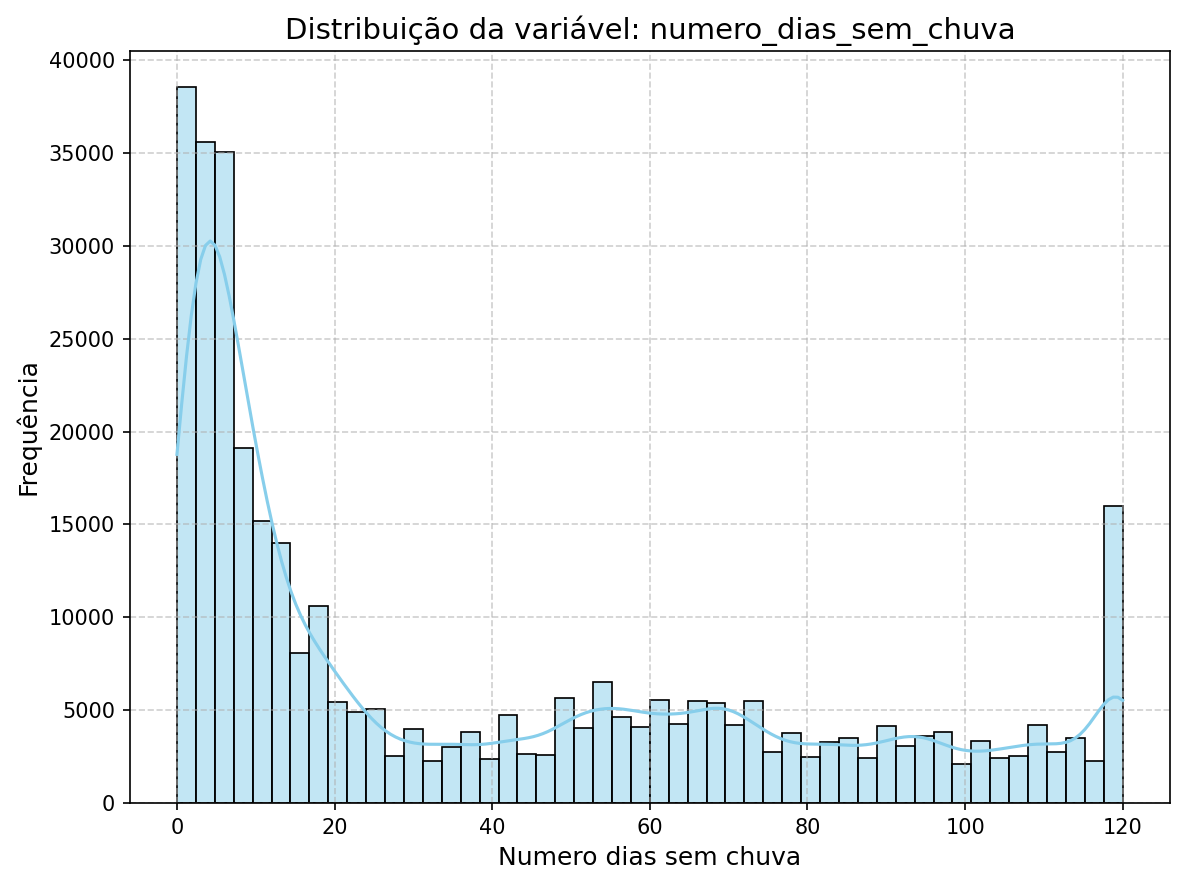

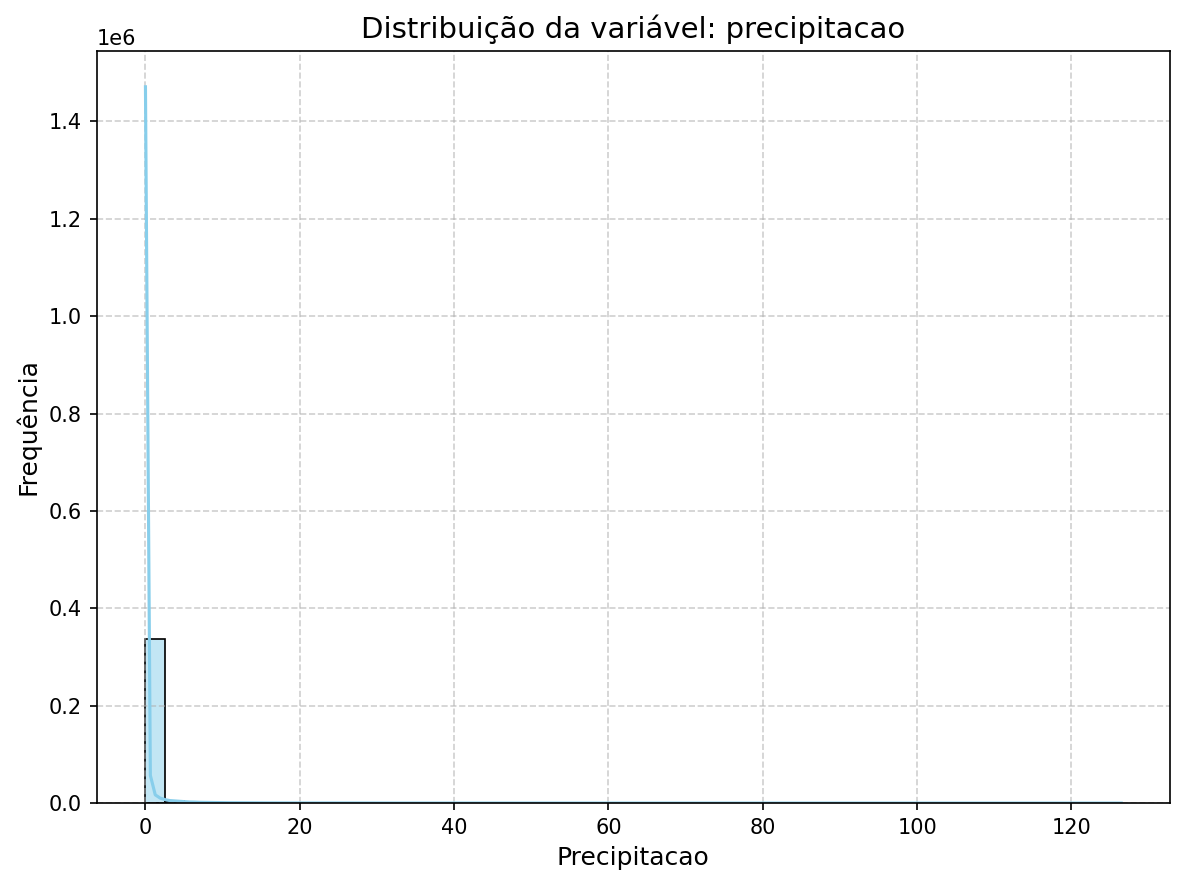

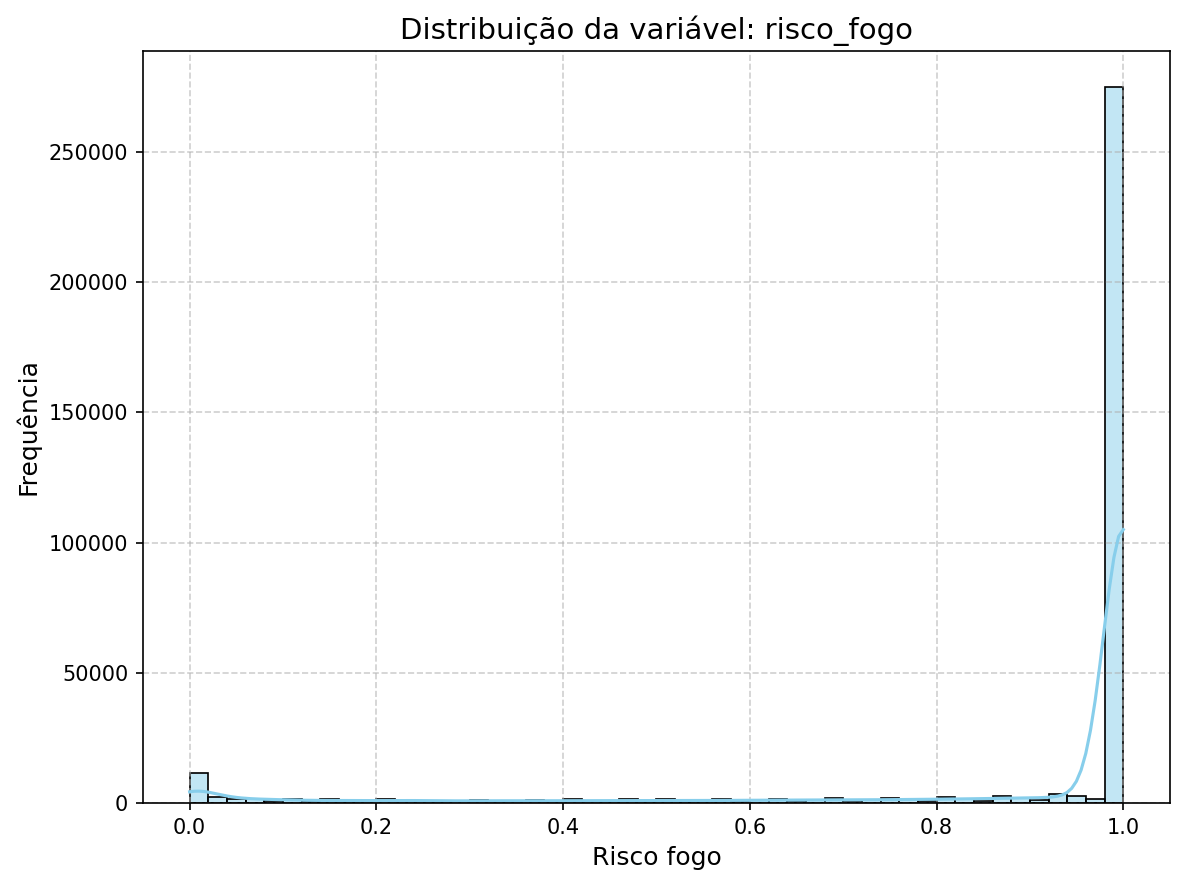

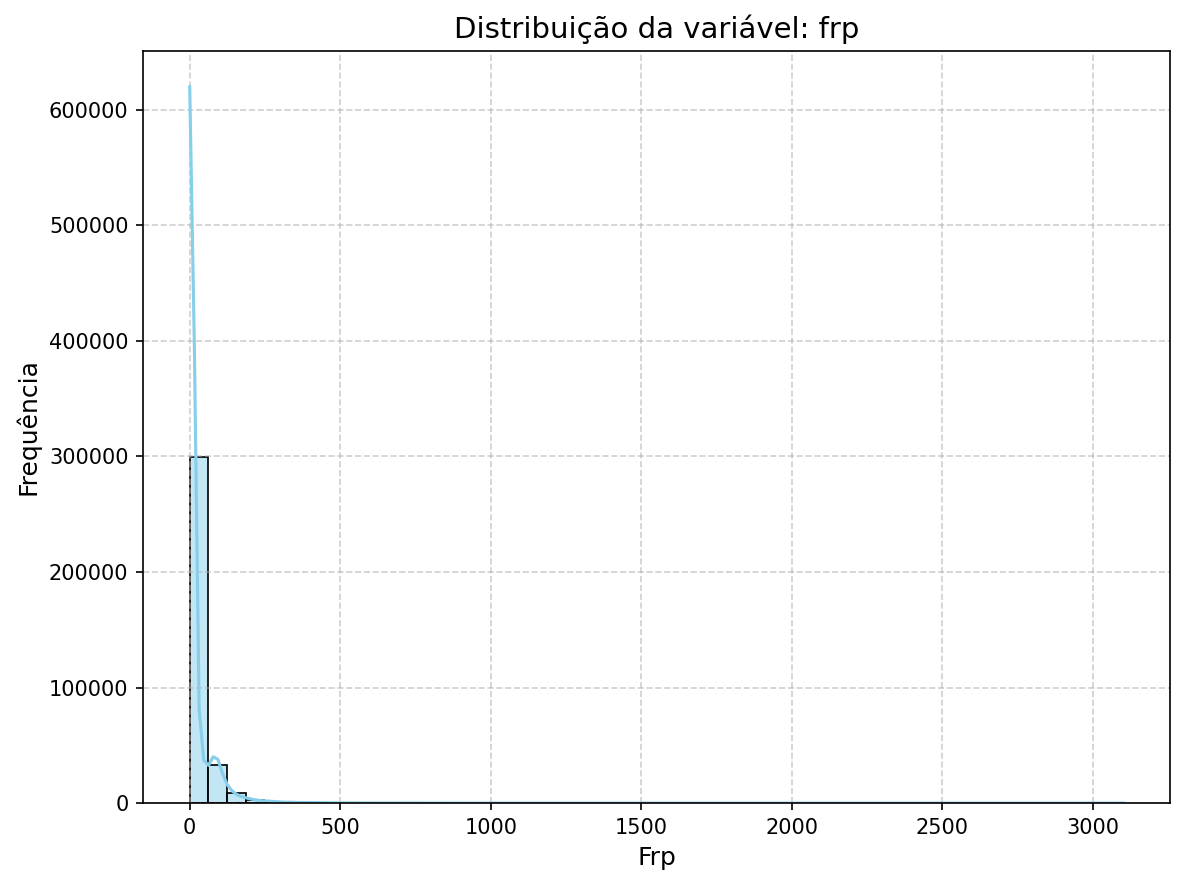

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Lista das colunas numéricas
colunas_numericas = ['numero_dias_sem_chuva', 'precipitacao', 'risco_fogo', 'frp']

# Loop para gerar gráficos separados
for col in colunas_numericas:
    plt.figure(figsize=(8, 6), dpi=150)  # Tamanho e resolução aumentados
    sns.histplot(data=df, x=col, bins=50, kde=True, color='skyblue')
    plt.title(f'Distribuição da variável: {col}', fontsize=14)
    plt.xlabel(col.replace('_', ' ').capitalize(), fontsize=12)
    plt.ylabel('Frequência', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)  # Grade leve para melhor visualização
    plt.tight_layout()
    plt.show()

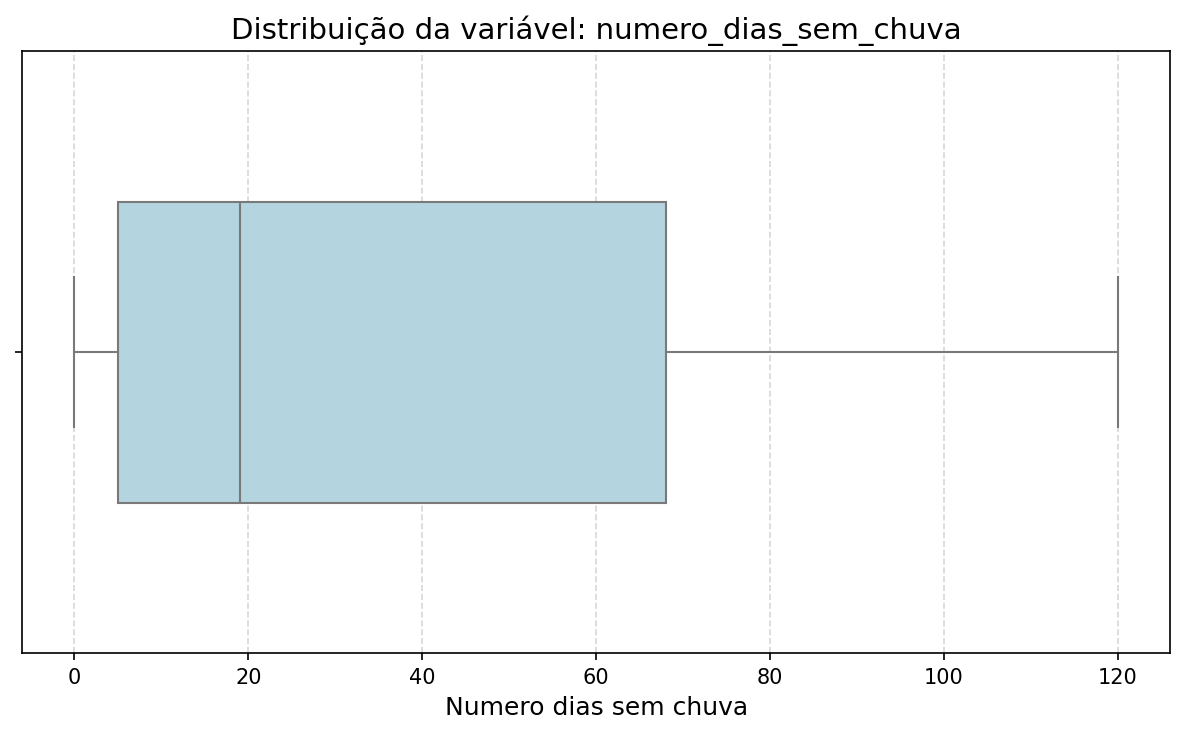

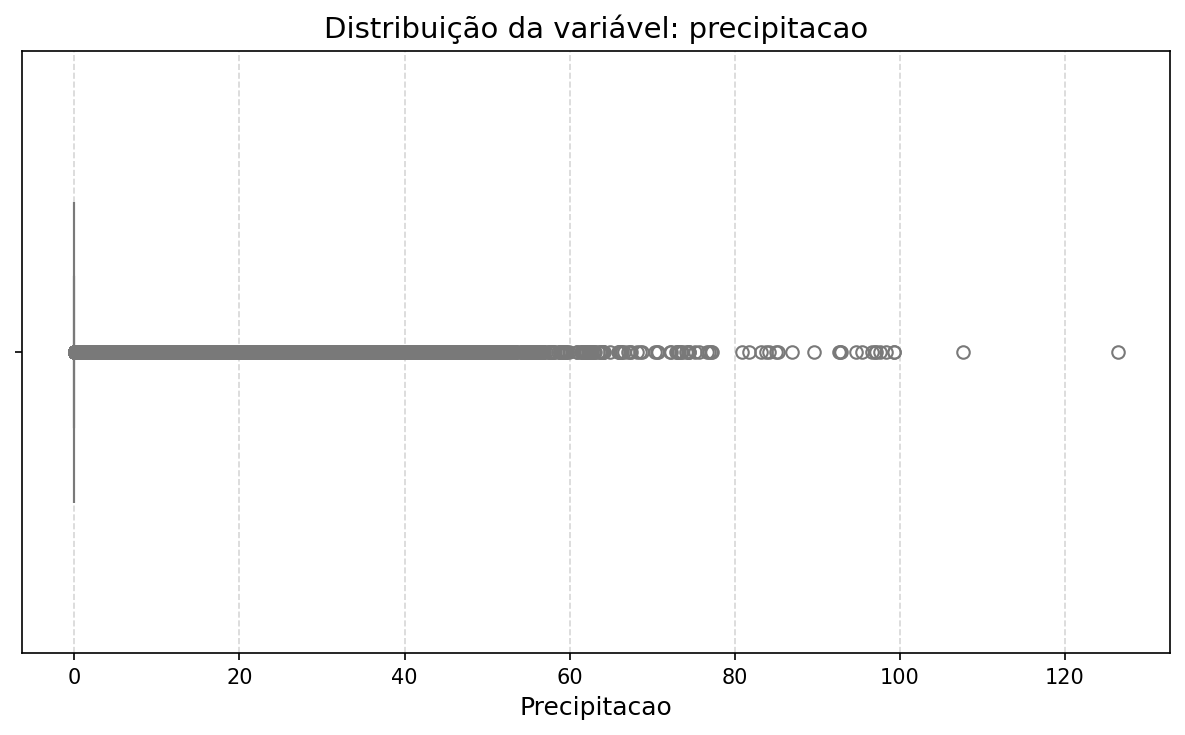

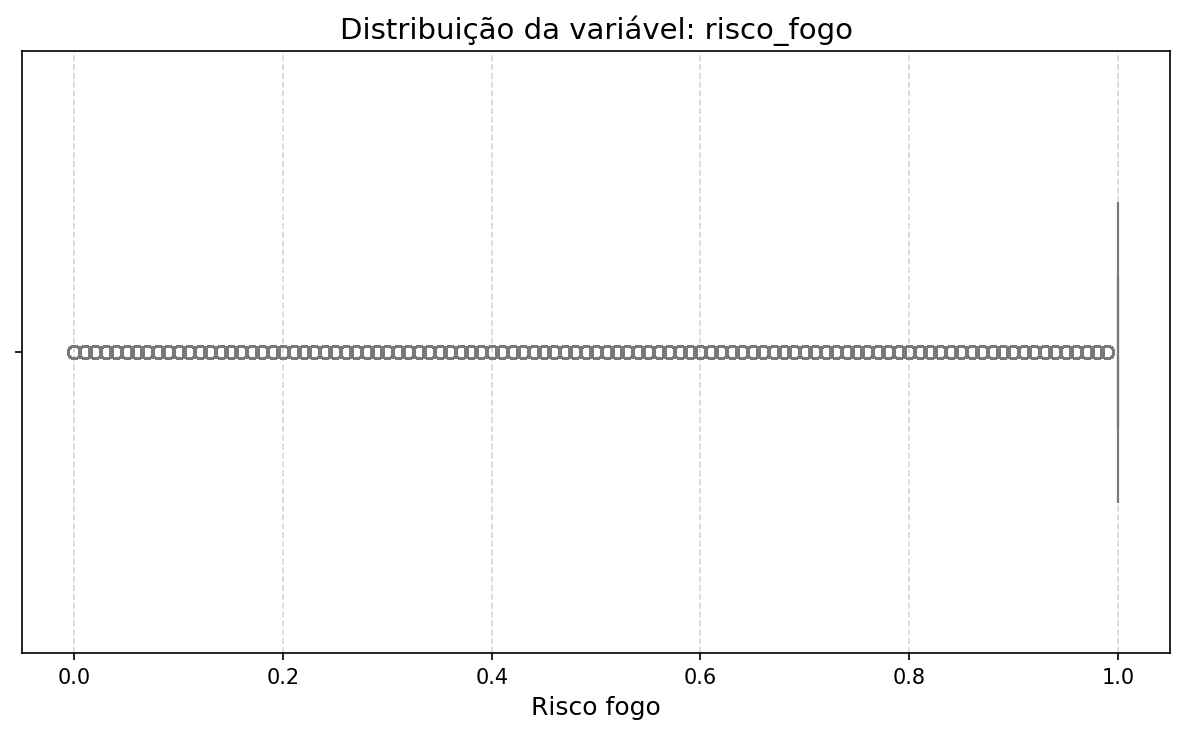

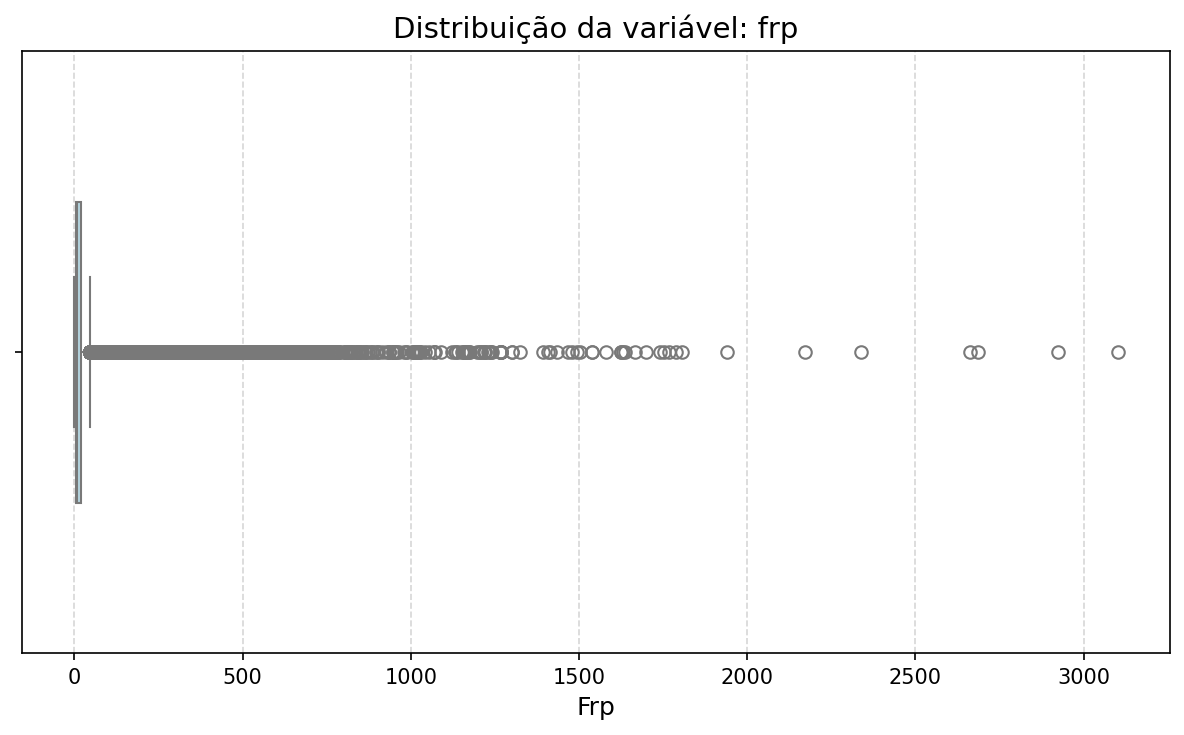

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Lista das colunas numéricas
colunas_numericas = ['numero_dias_sem_chuva', 'precipitacao', 'risco_fogo', 'frp']

# Loop para gerar boxplots separados com alta qualidade
for col in colunas_numericas:
    plt.figure(figsize=(8, 5), dpi=150)  # Tamanho ampliado + alta resolução
    sns.boxplot(data=df, x=col, color='lightblue', width=0.5)

    # Títulos e rótulos
    plt.title(f'Distribuição da variável: {col}', fontsize=14)
    plt.xlabel(col.replace('_', ' ').capitalize(), fontsize=12)
    plt.grid(True, axis='x', linestyle='--', alpha=0.5)  # Grade leve no eixo x
    plt.tight_layout()
    plt.show()

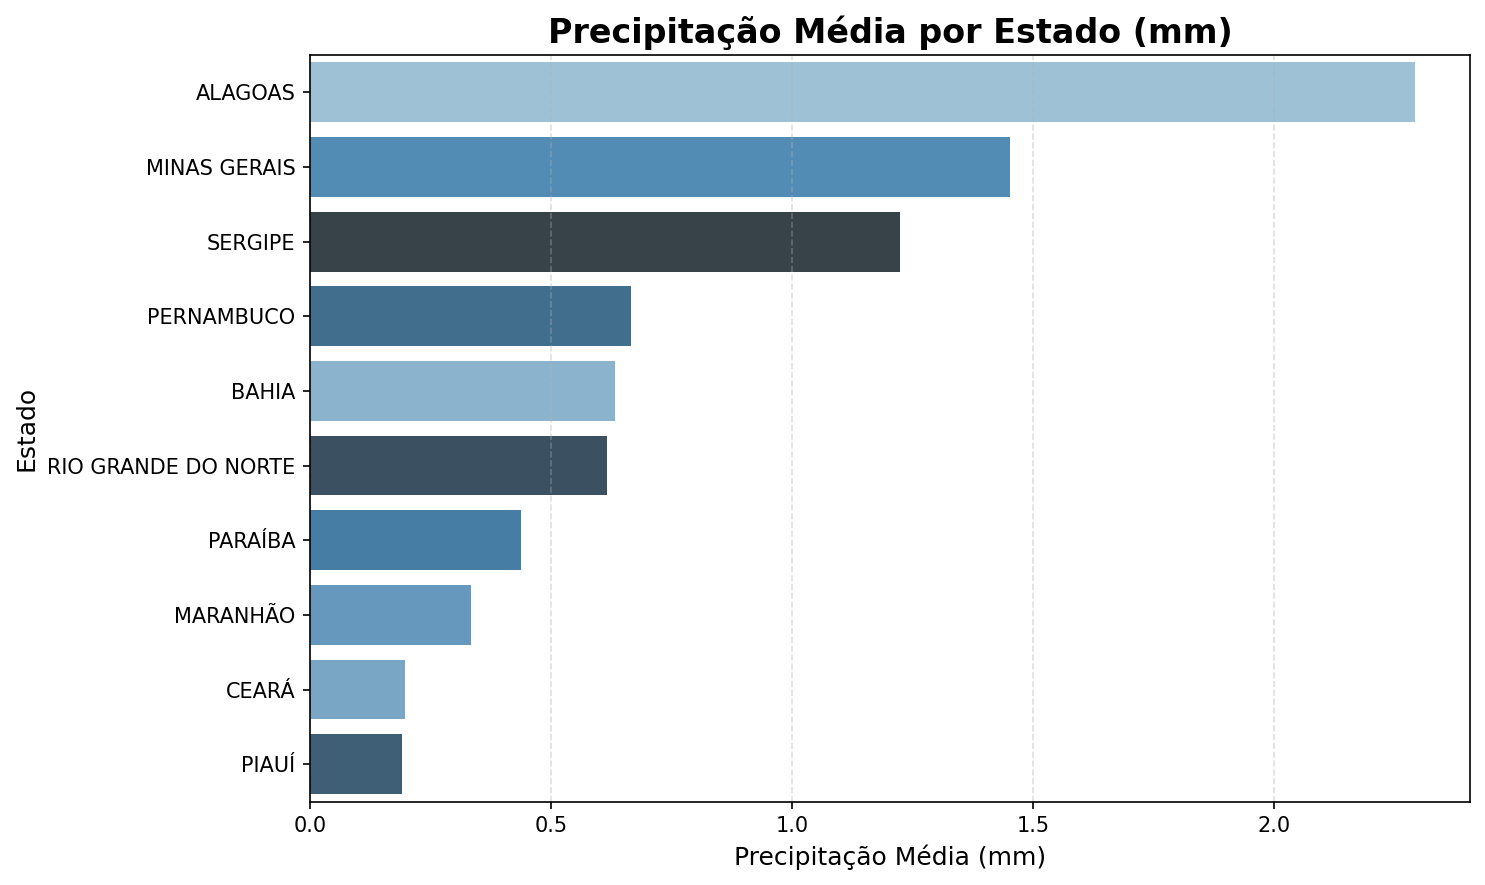

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Agrupar, calcular média e ordenar pelo valor de precipitação
prec_por_estado = (
    df.groupby('estado', observed=True)['precipitacao']
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)

# Ordenar explicitamente o eixo Y pelos valores da média
estado_order = prec_por_estado.sort_values(by='precipitacao', ascending=False)['estado']

# Gerar gráfico com ordenação correta
plt.figure(figsize=(10, 6), dpi=150)
sns.barplot(
    data=prec_por_estado,
    x='precipitacao',
    y='estado',
    hue='estado',
    dodge=False,
    palette='Blues_d',
    legend=False,
    order=estado_order
)

# Estética e rótulos
plt.title('Precipitação Média por Estado (mm)', fontsize=16, weight='bold')
plt.xlabel('Precipitação Média (mm)', fontsize=12)
plt.ylabel('Estado', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

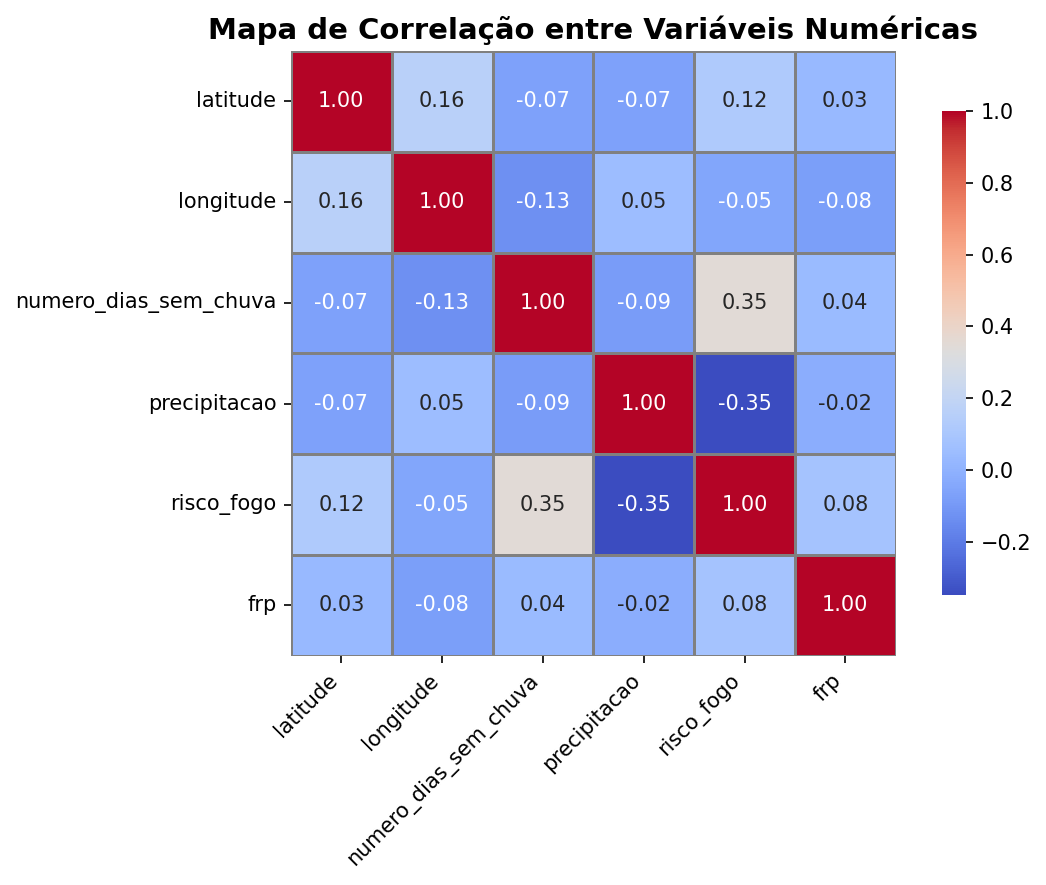

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gerar matriz de correlação apenas com colunas numéricas
matriz_corr = df.corr(numeric_only=True).round(2)

# Plotagem do heatmap com estilo refinado
plt.figure(figsize=(8, 6), dpi=150)
sns.heatmap(
    matriz_corr,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    linewidths=0.5,
    linecolor='gray',
    square=True,
    cbar_kws={"shrink": 0.8}
)

# Estética
plt.title('Mapa de Correlação entre Variáveis Numéricas', fontsize=14, weight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

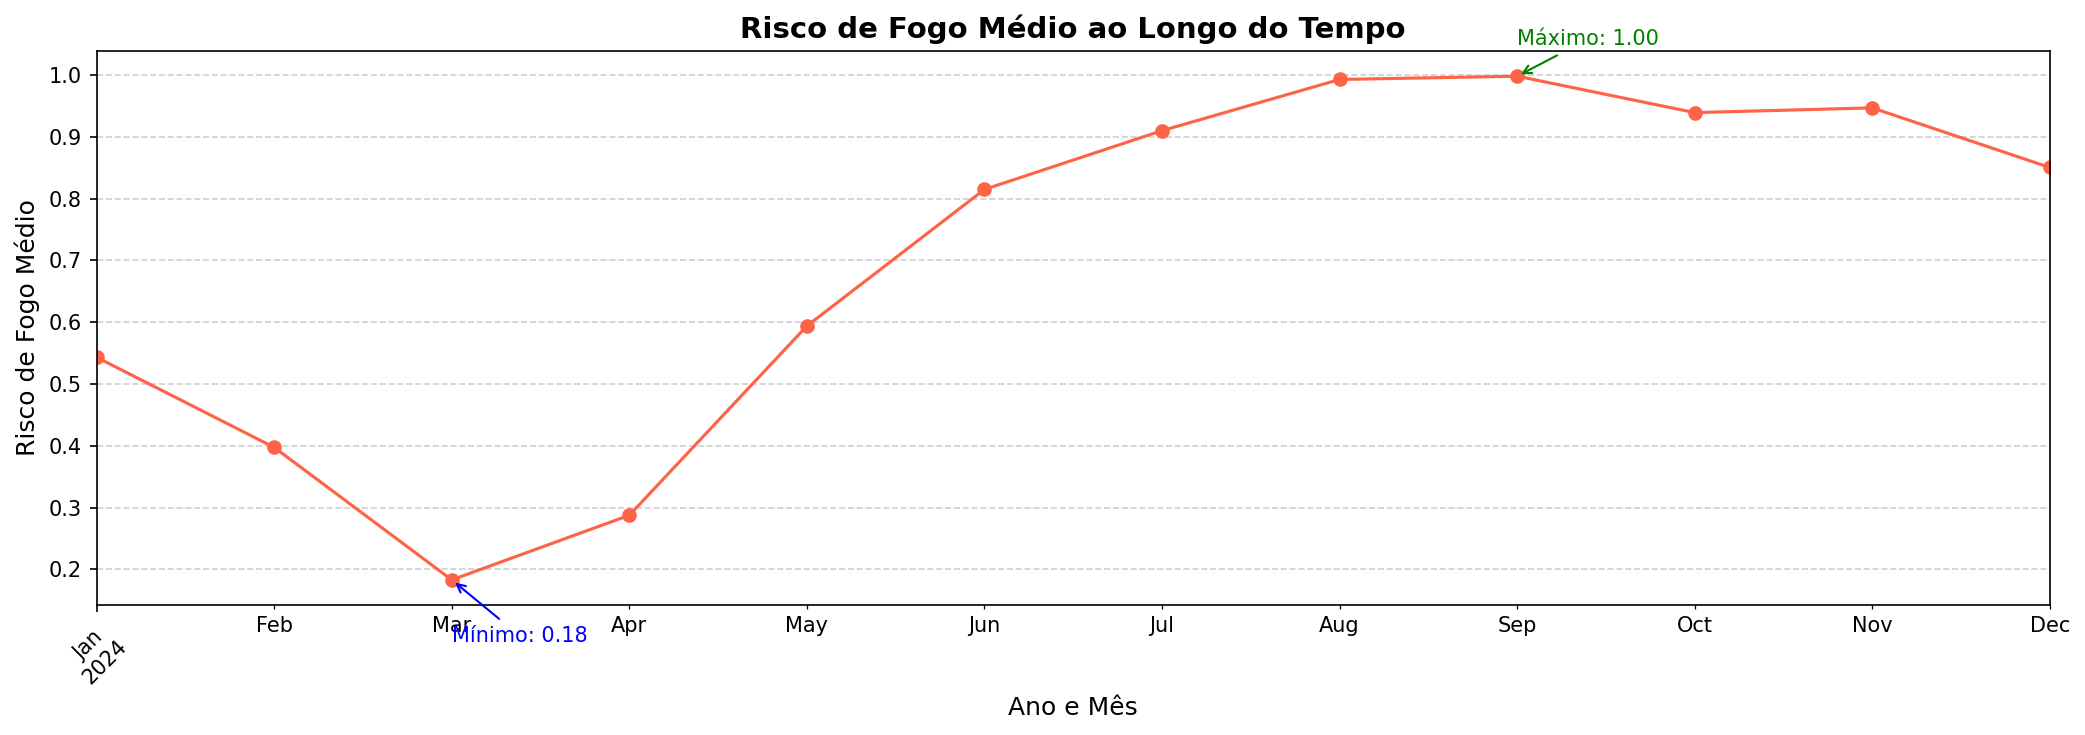

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Converter a coluna de data para datetime (se ainda não tiver feito)
df['data_pas'] = pd.to_datetime(df['data_pas'], errors='coerce')

# Criar coluna de ano e mês
df['ano_mes'] = df['data_pas'].dt.to_period('M')

# Calcular risco médio de fogo por mês
risco_por_tempo = df.groupby('ano_mes')['risco_fogo'].mean()

# Identificar mês com maior e menor risco
mes_maior_risco = risco_por_tempo.idxmax()
valor_maior_risco = risco_por_tempo.max()

mes_menor_risco = risco_por_tempo.idxmin()
valor_menor_risco = risco_por_tempo.min()

# Plotar o gráfico
plt.figure(figsize=(14, 5), dpi=150)
risco_por_tempo.plot(kind='line', marker='o', color='tomato')

# Títulos e rótulos
plt.title('Risco de Fogo Médio ao Longo do Tempo', fontsize=14, weight='bold')
plt.xlabel('Ano e Mês', fontsize=12)
plt.ylabel('Risco de Fogo Médio', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)

# Anotações nos picos
plt.annotate(f'Máximo: {valor_maior_risco:.2f}',
             xy=(mes_maior_risco.to_timestamp(), valor_maior_risco),
             xytext=(mes_maior_risco.to_timestamp(), valor_maior_risco + 0.05),
             arrowprops=dict(arrowstyle='->', color='green'),
             color='green')

plt.annotate(f'Mínimo: {valor_menor_risco:.2f}',
             xy=(mes_menor_risco.to_timestamp(), valor_menor_risco),
             xytext=(mes_menor_risco.to_timestamp(), valor_menor_risco - 0.1),
             arrowprops=dict(arrowstyle='->', color='blue'),
             color='blue')

plt.tight_layout()
plt.show()

In [ ]:
import folium
from folium.plugins import HeatMap

# Filtrar apenas registros com risco máximo (1.0) e coordenadas válidas
df_mapa = df[df['risco_fogo'] == 1.0][['latitude', 'longitude', 'risco_fogo']].dropna()

# Amostrar para evitar sobrecarga no navegador (ex: limite de 8000 pontos)
df_mapa_sample = df_mapa.sample(n=min(8000, len(df_mapa)), random_state=42)

# Criar mapa centrado aproximadamente na região da Caatinga
mapa = folium.Map(location=[-9.5, -40.5], zoom_start=5, tiles='CartoDB positron')

# Preparar dados para o HeatMap
heat_data = df_mapa_sample[['latitude', 'longitude', 'risco_fogo']].values.tolist()

# Adicionar camada de calor
HeatMap(
    heat_data,
    radius=10,
    blur=15,
    max_zoom=6
).add_to(mapa)

# Exibir o mapa
mapa

# Análise Multivariada
## Dias sem chuva X Risco fogo

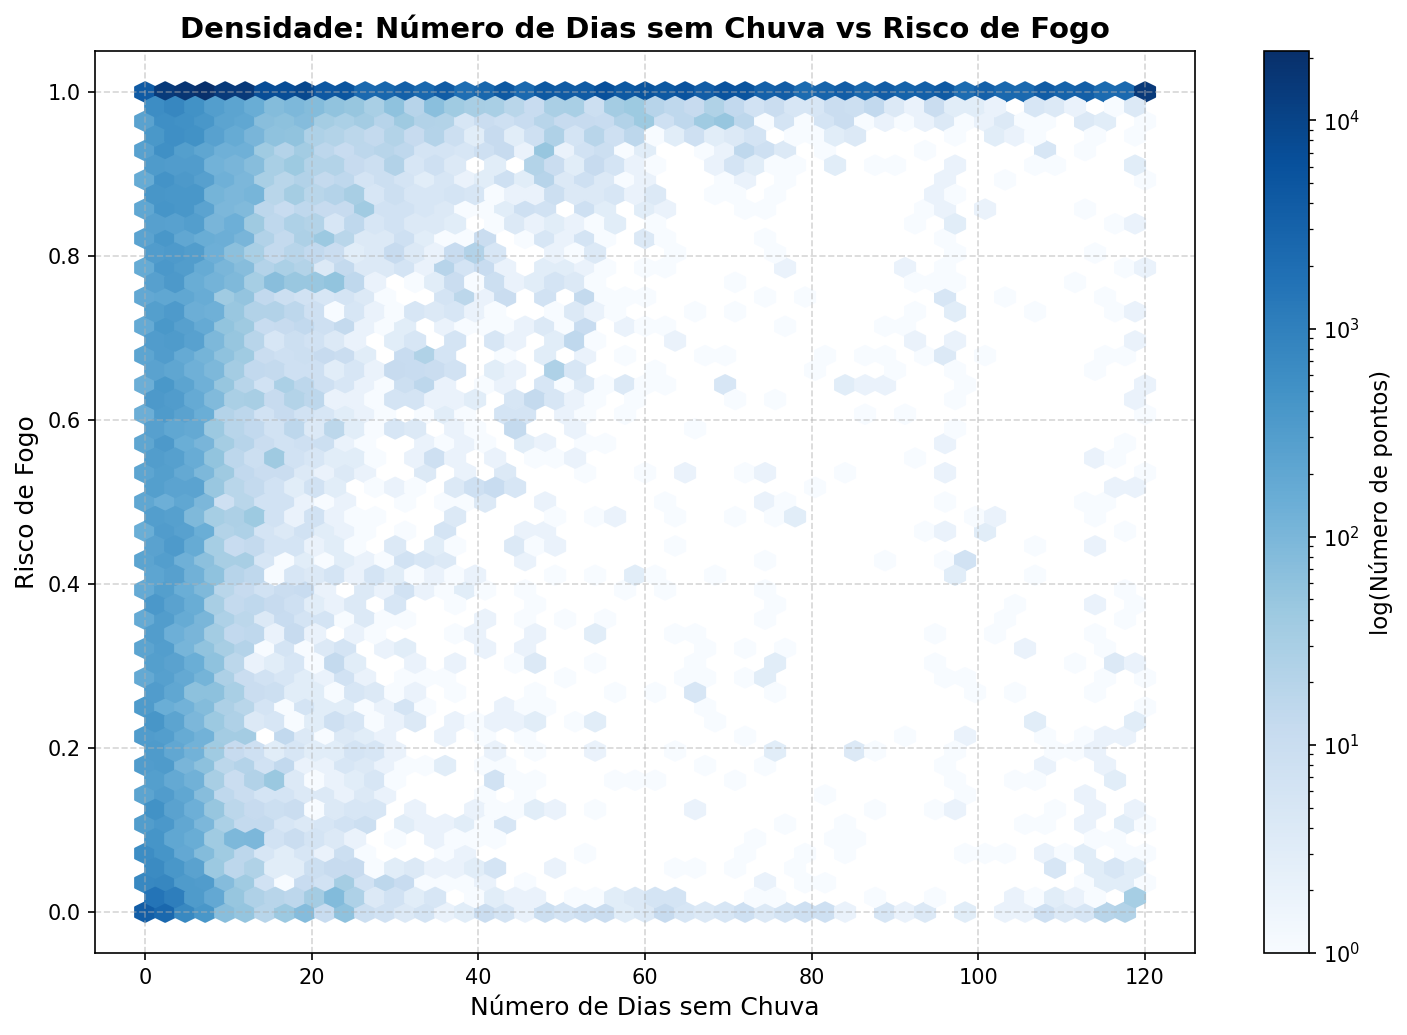

In [ ]:
import matplotlib.pyplot as plt

# Criar gráfico hexbin com contagem logarítmica e melhor apresentação
plt.figure(figsize=(10, 7), dpi=150)
hb = plt.hexbin(
    df['numero_dias_sem_chuva'],
    df['risco_fogo'],
    gridsize=50,
    cmap='Blues',
    bins='log'
)

# Barra de cores com rótulo explicativo
cbar = plt.colorbar(hb)
cbar.set_label('log(Número de pontos)', fontsize=11)

# Títulos e rótulos formatados
plt.title('Densidade: Número de Dias sem Chuva vs Risco de Fogo', fontsize=14, weight='bold')
plt.xlabel('Número de Dias sem Chuva', fontsize=12)
plt.ylabel('Risco de Fogo', fontsize=12)

# Grade leve para melhor leitura
plt.grid(True, linestyle='--', alpha=0.5)

# Layout final
plt.tight_layout()
plt.show()

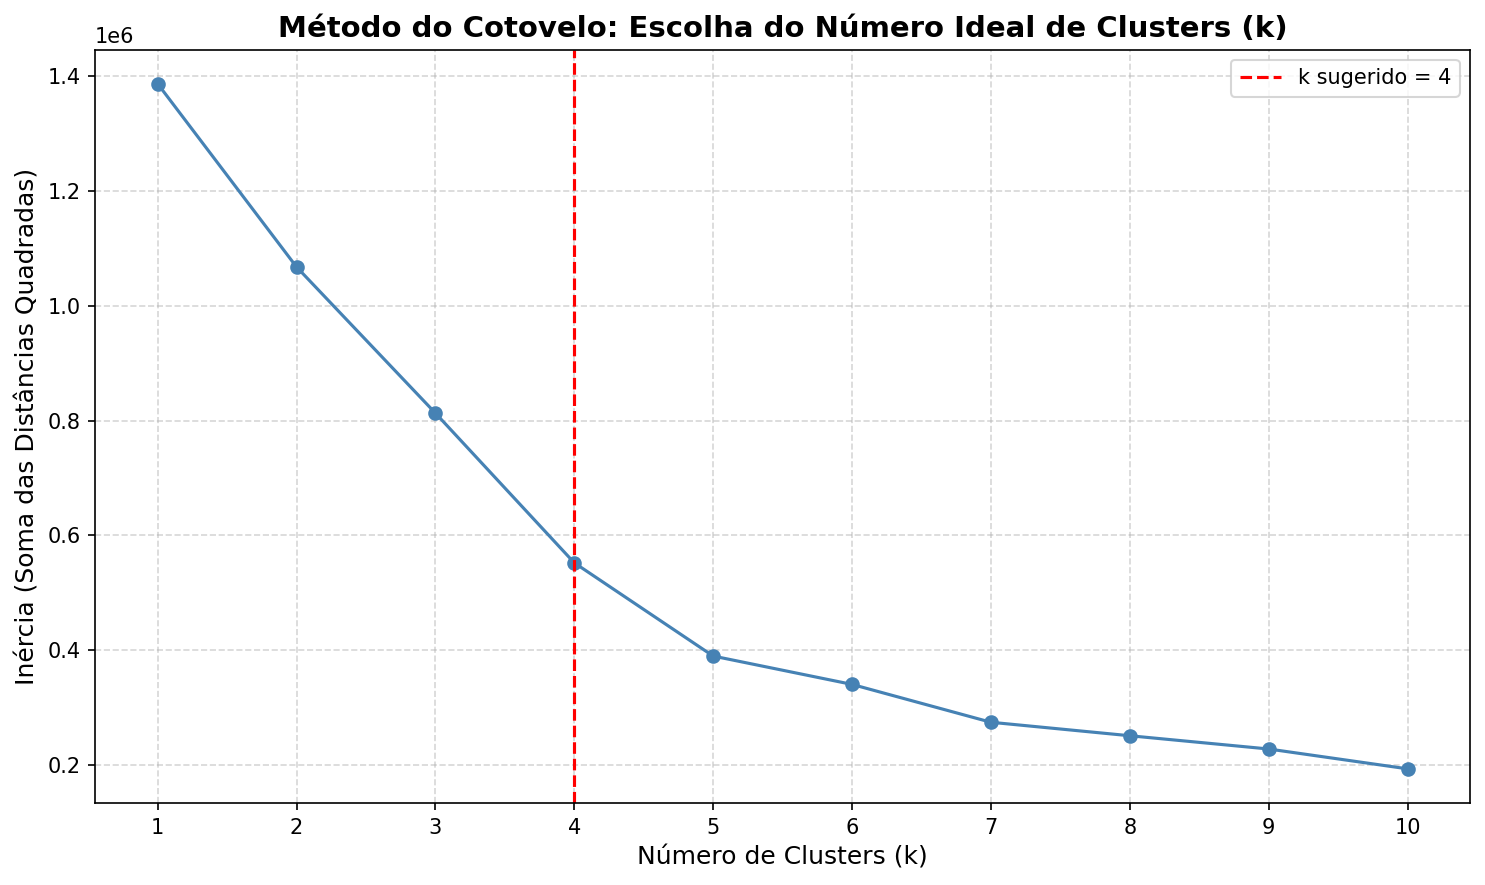

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Seleção das variáveis numéricas
variaveis_numericas = df[['numero_dias_sem_chuva', 'precipitacao', 'risco_fogo', 'frp']]

# Padronização
scaler = StandardScaler()
dados_padronizados = scaler.fit_transform(variaveis_numericas)

# Calcular inércia para vários valores de k
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(dados_padronizados)
    inertia.append(kmeans.inertia_)

# Plotagem da curva com melhorias visuais
plt.figure(figsize=(10, 6), dpi=150)
plt.plot(k_range, inertia, marker='o', linestyle='-', color='steelblue')
plt.xticks(k_range)
plt.title('Método do Cotovelo: Escolha do Número Ideal de Clusters (k)', fontsize=14, weight='bold')
plt.xlabel('Número de Clusters (k)', fontsize=12)
plt.ylabel('Inércia (Soma das Distâncias Quadradas)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

# Destaque no possível ponto de cotovelo (exemplo manual em k=3 ou 4)
k_sugerido = 4  # ajuste manual conforme visualização
plt.axvline(k_sugerido, color='red', linestyle='--', label=f'k sugerido = {k_sugerido}')
plt.legend()

plt.tight_layout()
plt.show()

numero_dias_sem_chuva  precipitacao  risco_fogo         frp
cluster                                                             
0                    41.951949      0.046316    0.982413  191.663834
1                    13.994990      0.109544    0.967923   17.416895
2                    12.835092     32.322250    0.009445   13.420267
3                     4.520858      1.323903    0.211140   15.066508
4                    85.157049      0.034046    0.999054   18.345604

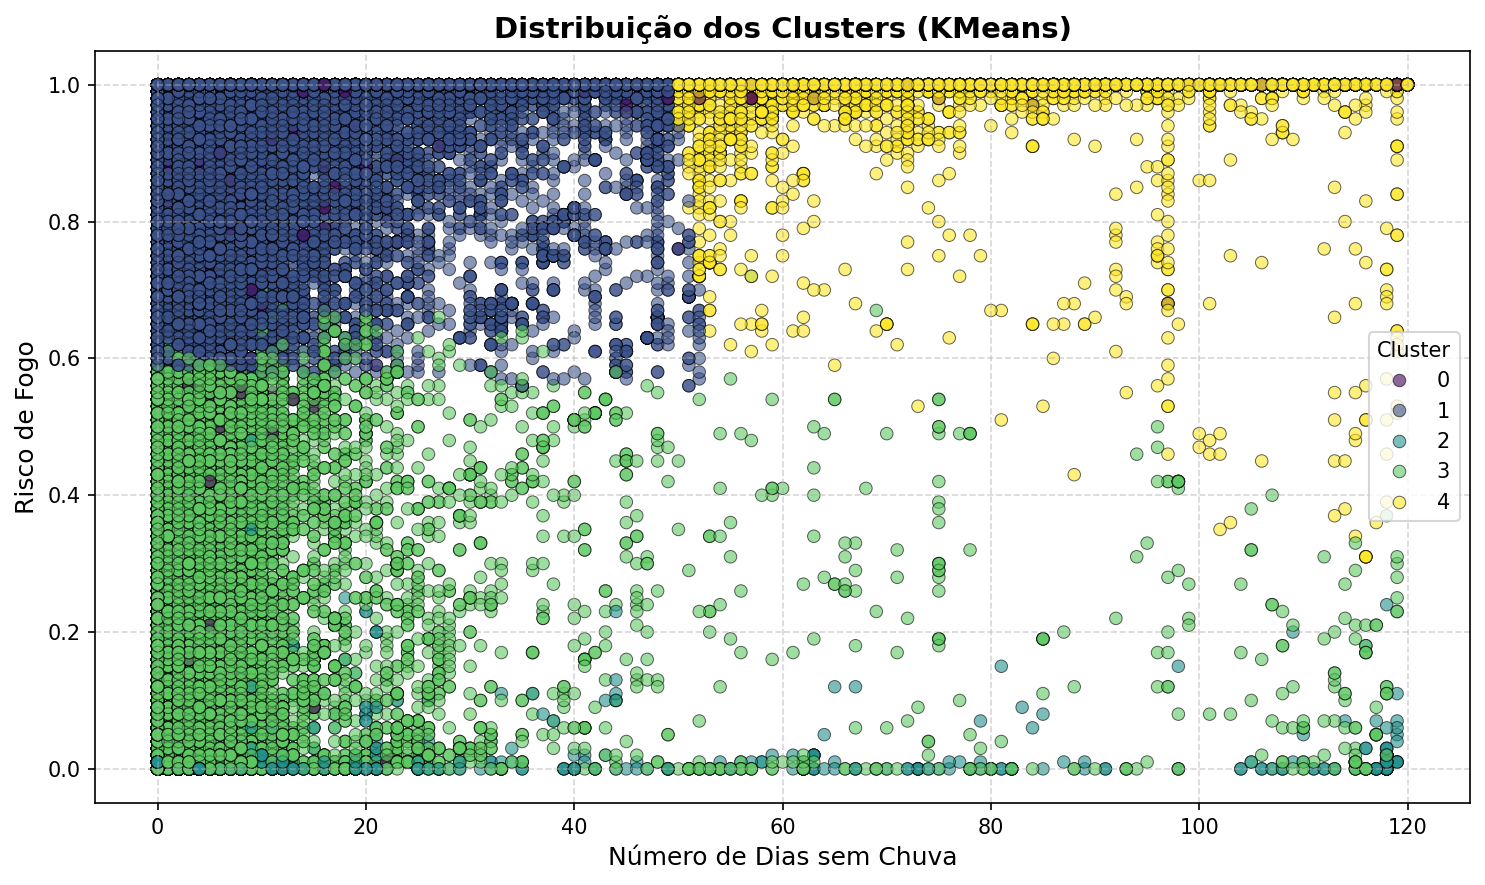

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Selecionar variáveis numéricas
variaveis_numericas = df[['numero_dias_sem_chuva', 'precipitacao', 'risco_fogo', 'frp']]

# 2. Padronizar os dados
scaler = StandardScaler()
dados_padronizados = scaler.fit_transform(variaveis_numericas)

# 3. Aplicar KMeans com k=5 (pode ajustar conforme cotovelo)
kmeans = KMeans(n_clusters=5, random_state=42, n_init='auto')
kmeans.fit(dados_padronizados)

# 4. Atribuir clusters ao DataFrame original
df['cluster'] = kmeans.labels_

# 5. Análise descritiva por cluster
analise_clusters = df.groupby('cluster')[['numero_dias_sem_chuva', 'precipitacao', 'risco_fogo', 'frp']].mean()
display(analise_clusters)

# 6. Visualização dos clusters
plt.figure(figsize=(10, 6), dpi=150)
sns.scatterplot(
    data=df,
    x='numero_dias_sem_chuva',
    y='risco_fogo',
    hue='cluster',
    palette='viridis',
    alpha=0.6,
    edgecolor='k'
)

plt.title('Distribuição dos Clusters (KMeans)', fontsize=14, weight='bold')
plt.xlabel('Número de Dias sem Chuva', fontsize=12)
plt.ylabel('Risco de Fogo', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

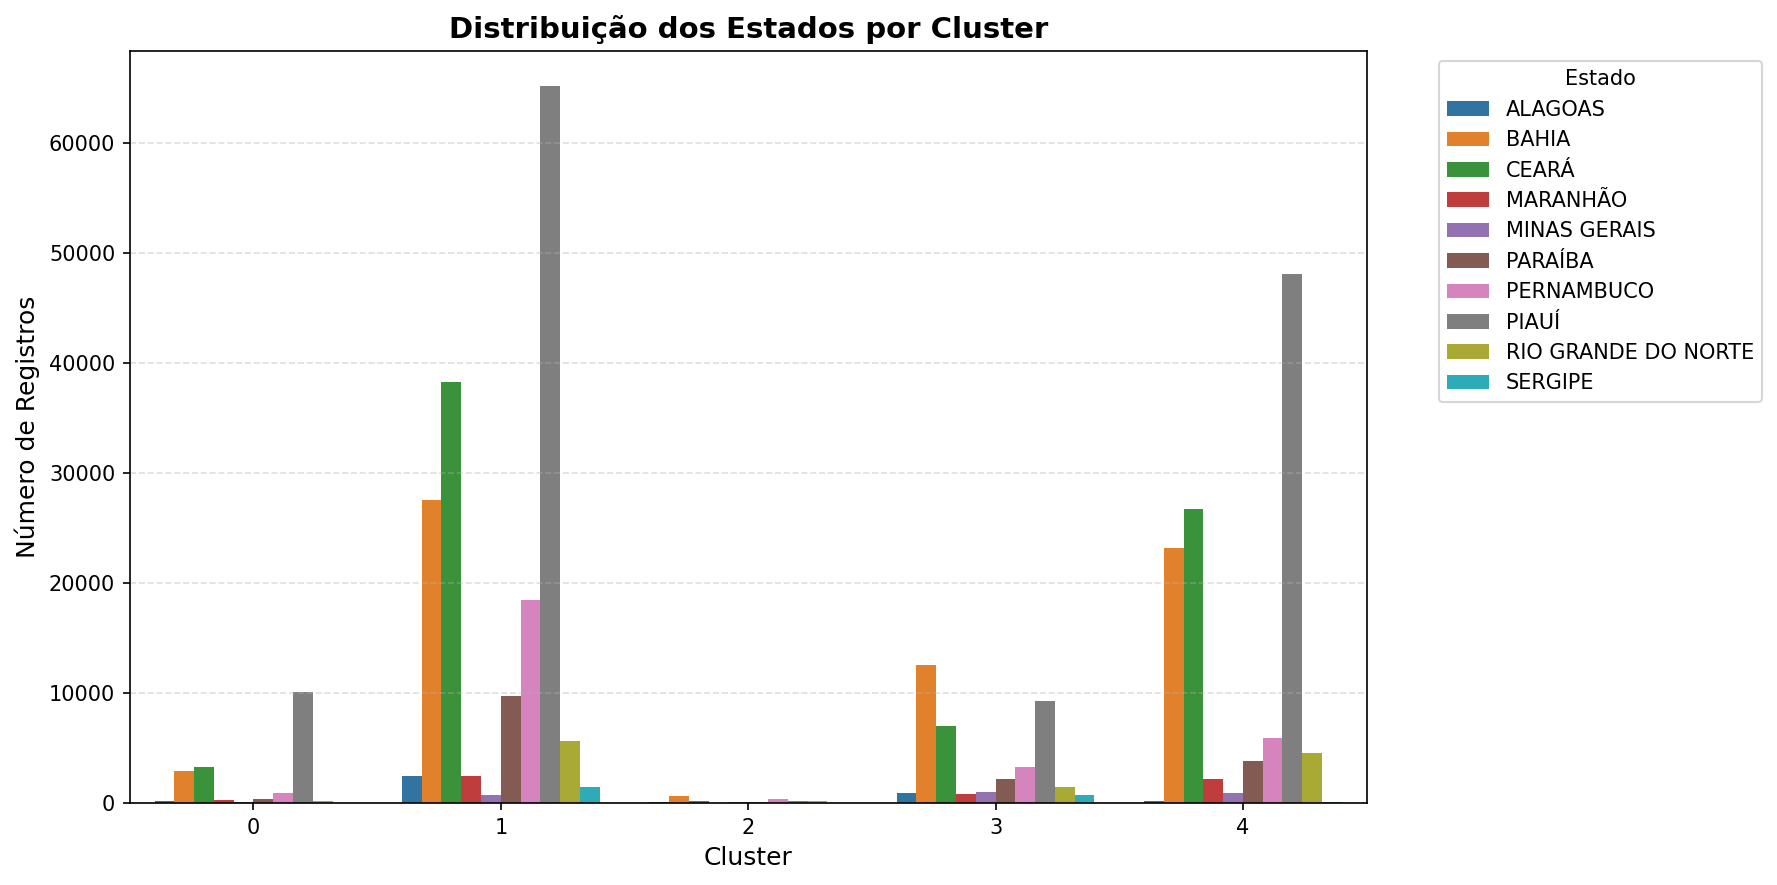


📊 Estatísticas - Cluster 0

  ▶ Estado: ALAGOAS
       numero_dias_sem_chuva  precipitacao  risco_fogo     frp
count                 198.00        198.00      198.00  198.00
mean                   11.66          0.57        1.00  120.83
std                     7.28          1.27        0.02   11.12
min                     0.00          0.00        0.83  106.10
25%                     7.25          0.00        1.00  113.22
50%                    11.00          0.00        1.00  118.10
75%                    15.00          0.30        1.00  124.50
max                    53.00          8.88        1.00  180.00

  ▶ Estado: BAHIA
       numero_dias_sem_chuva  precipitacao  risco_fogo      frp
count                2919.00       2919.00     2919.00  2919.00
mean                   53.84          0.06        0.98   199.71
std                    33.92          0.40        0.11   166.31
min                     0.00          0.00        0.00    98.10
25%                    25.00          0.00   

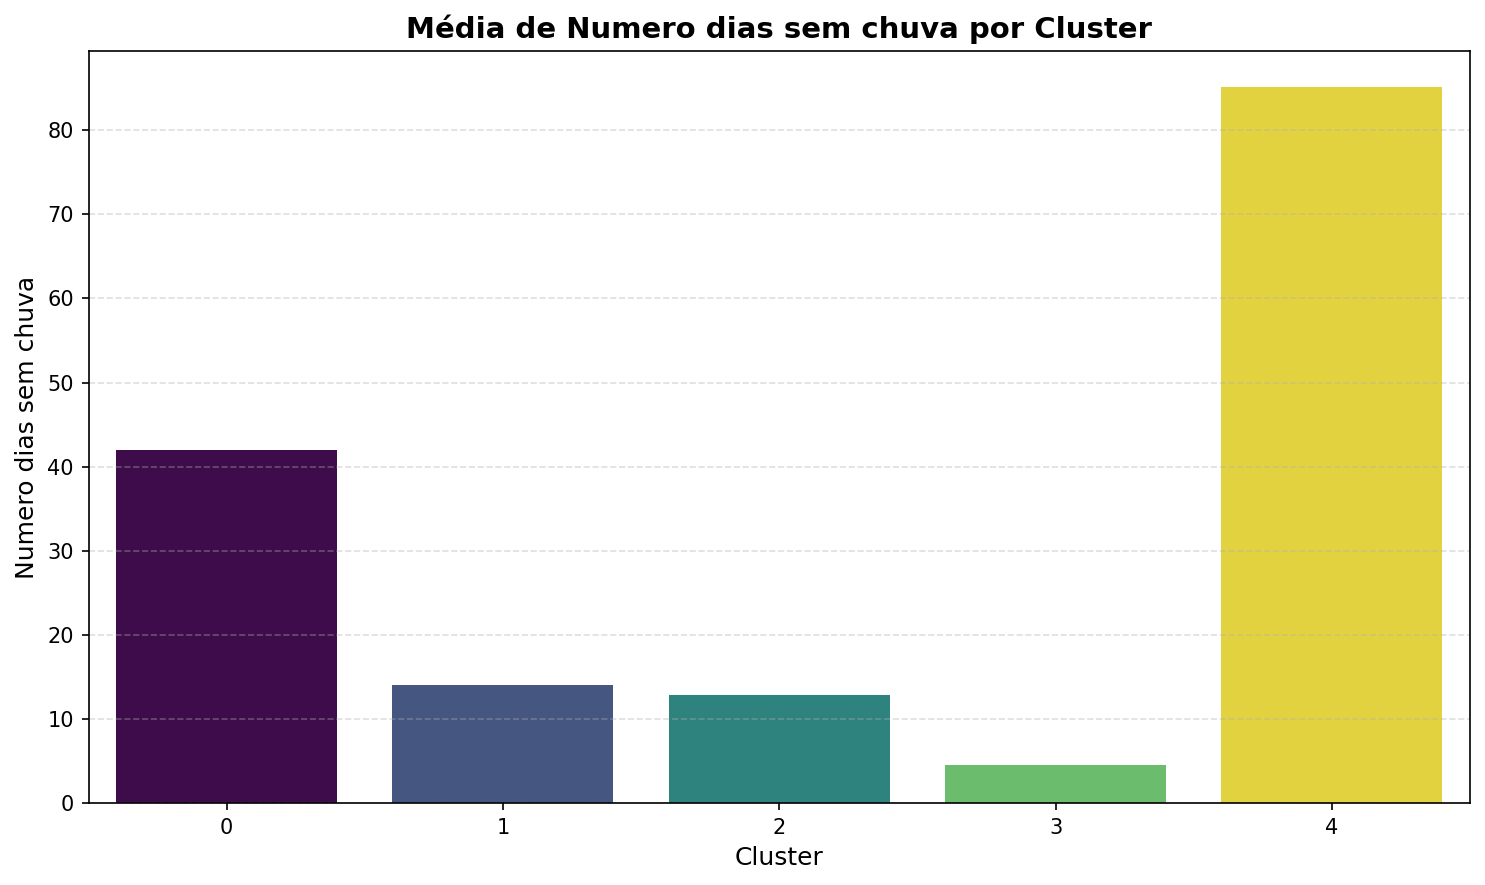

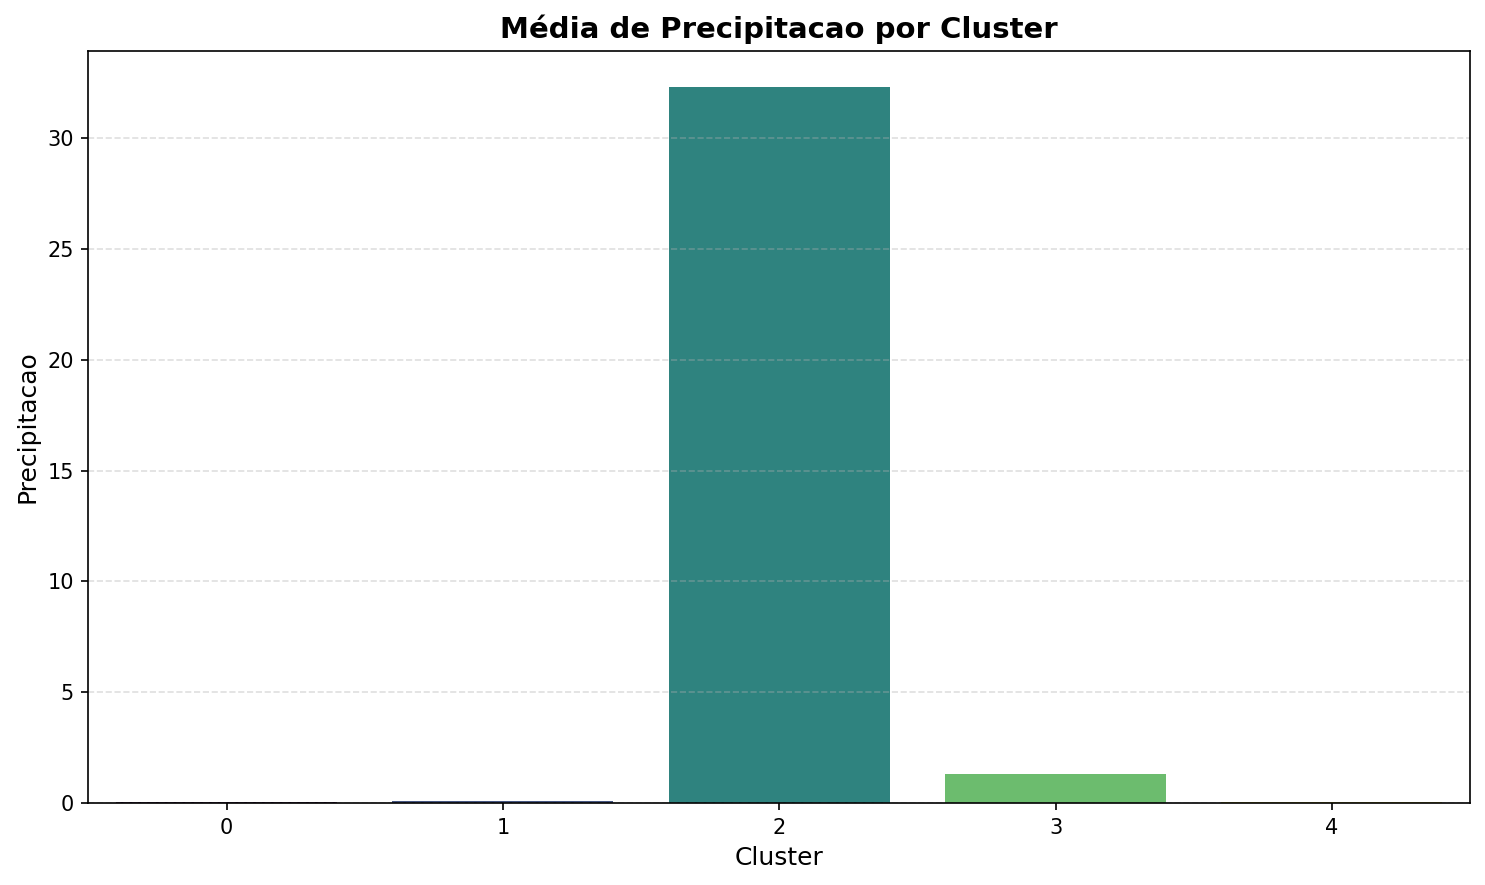

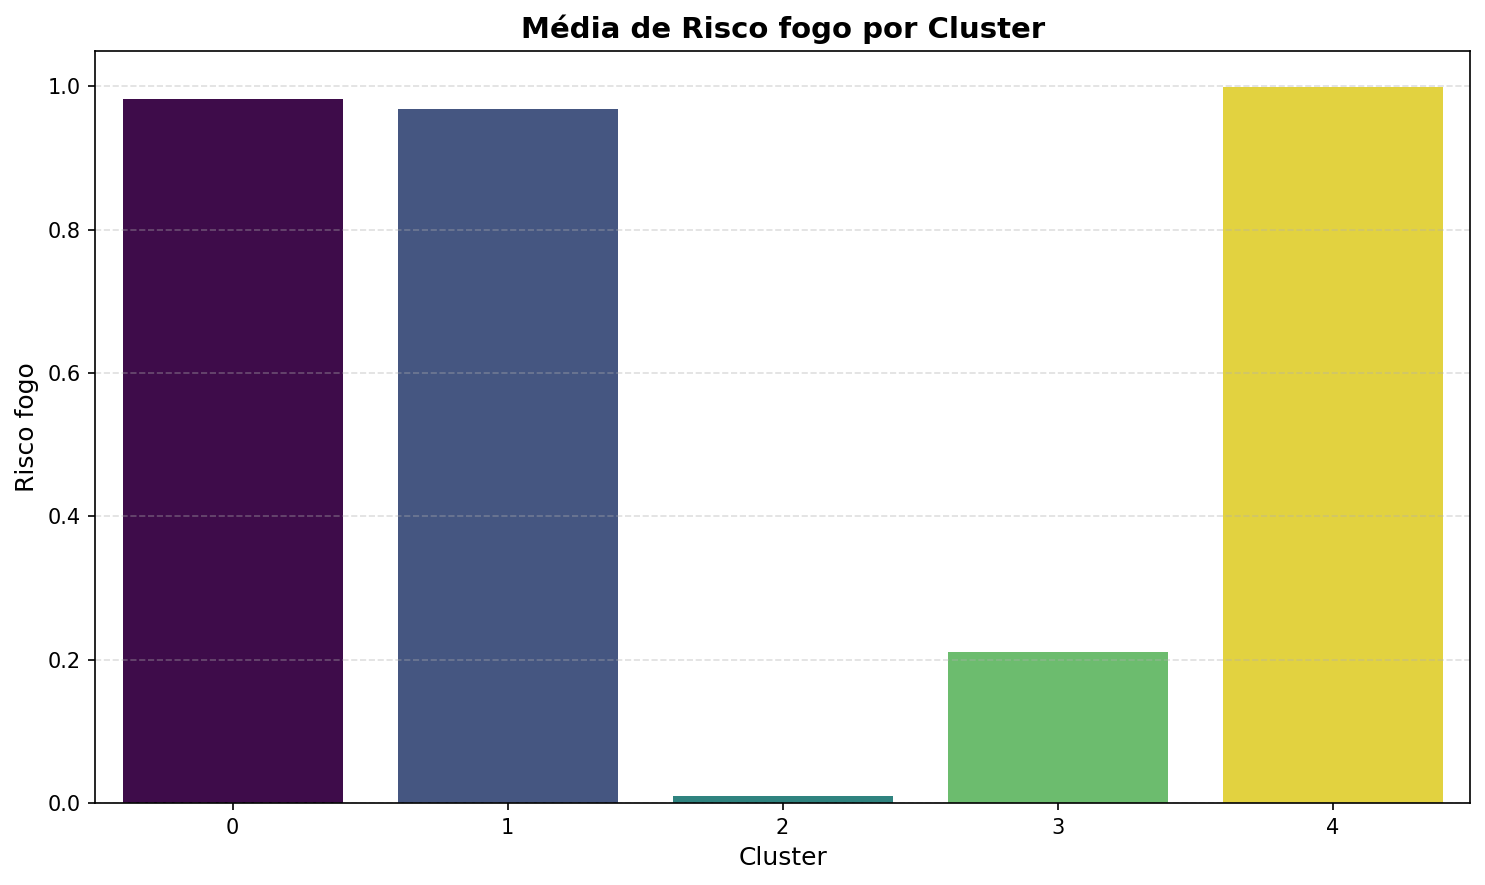

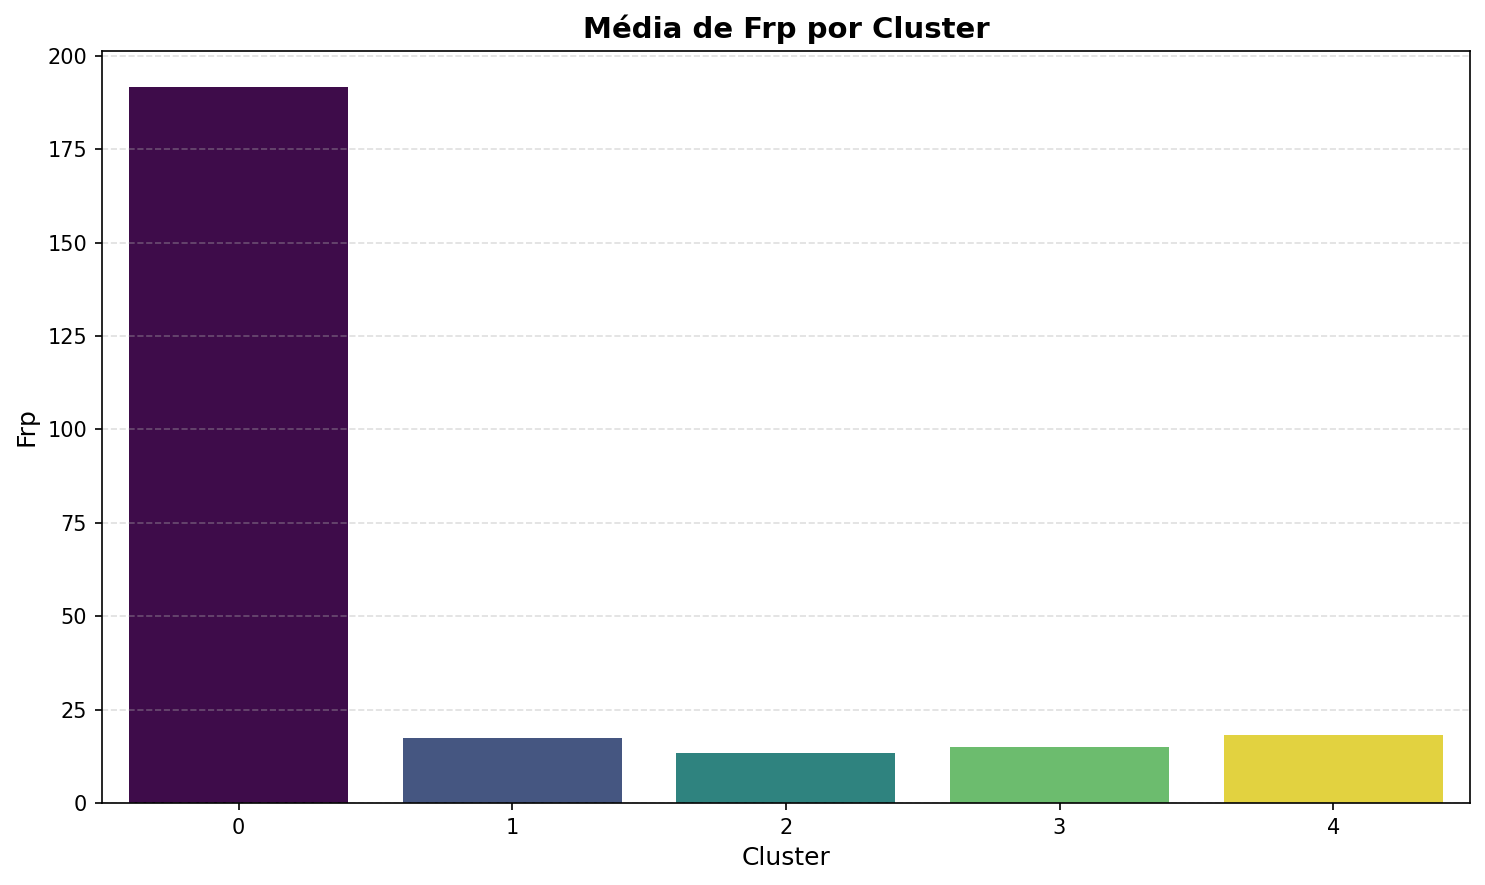

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Gráfico: distribuição dos estados por cluster
plt.figure(figsize=(12, 6), dpi=150)
sns.countplot(x='cluster', hue='estado', data=df, palette='tab10')
plt.title('Distribuição dos Estados por Cluster', fontsize=14, weight='bold')
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Número de Registros', fontsize=12)
plt.legend(title='Estado', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()

# 2. Estatísticas descritivas por cluster e estado
for cluster in sorted(df['cluster'].unique()):
    print(f"\n📊 Estatísticas - Cluster {cluster}")
    cluster_data = df[df['cluster'] == cluster]
    for estado in sorted(cluster_data['estado'].unique()):
        estado_data = cluster_data[cluster_data['estado'] == estado]
        print(f"\n  ▶ Estado: {estado}")
        print(estado_data[['numero_dias_sem_chuva', 'precipitacao', 'risco_fogo', 'frp']].describe().round(2))

# 3. Gráficos de média por variável em cada cluster (com correções de FutureWarnings)
variaveis = ['numero_dias_sem_chuva', 'precipitacao', 'risco_fogo', 'frp']

for coluna in variaveis:
    plt.figure(figsize=(10, 6), dpi=150)
    sns.barplot(
        data=df,
        x='cluster',
        y=coluna,
        hue='cluster',            # evita warning futuro ao usar palette
        palette='viridis',
        legend=False,
        errorbar=None             # substitui ci=None
    )
    plt.title(f'Média de {coluna.replace("_", " ").capitalize()} por Cluster', fontsize=14, weight='bold')
    plt.xlabel('Cluster', fontsize=12)
    plt.ylabel(coluna.replace("_", " ").capitalize(), fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.4)
    plt.tight_layout()
    plt.show()

📊 Médias das variáveis em cada cluster (excluindo o cluster 2):
         numero_dias_sem_chuva  precipitacao  risco_fogo         frp
cluster                                                             
0                        41.95          0.05        0.98  191.660004
1                        13.99          0.11        0.97   17.420000
3                         4.52          1.32        0.21   15.070000
4                        85.16          0.03        1.00   18.350000


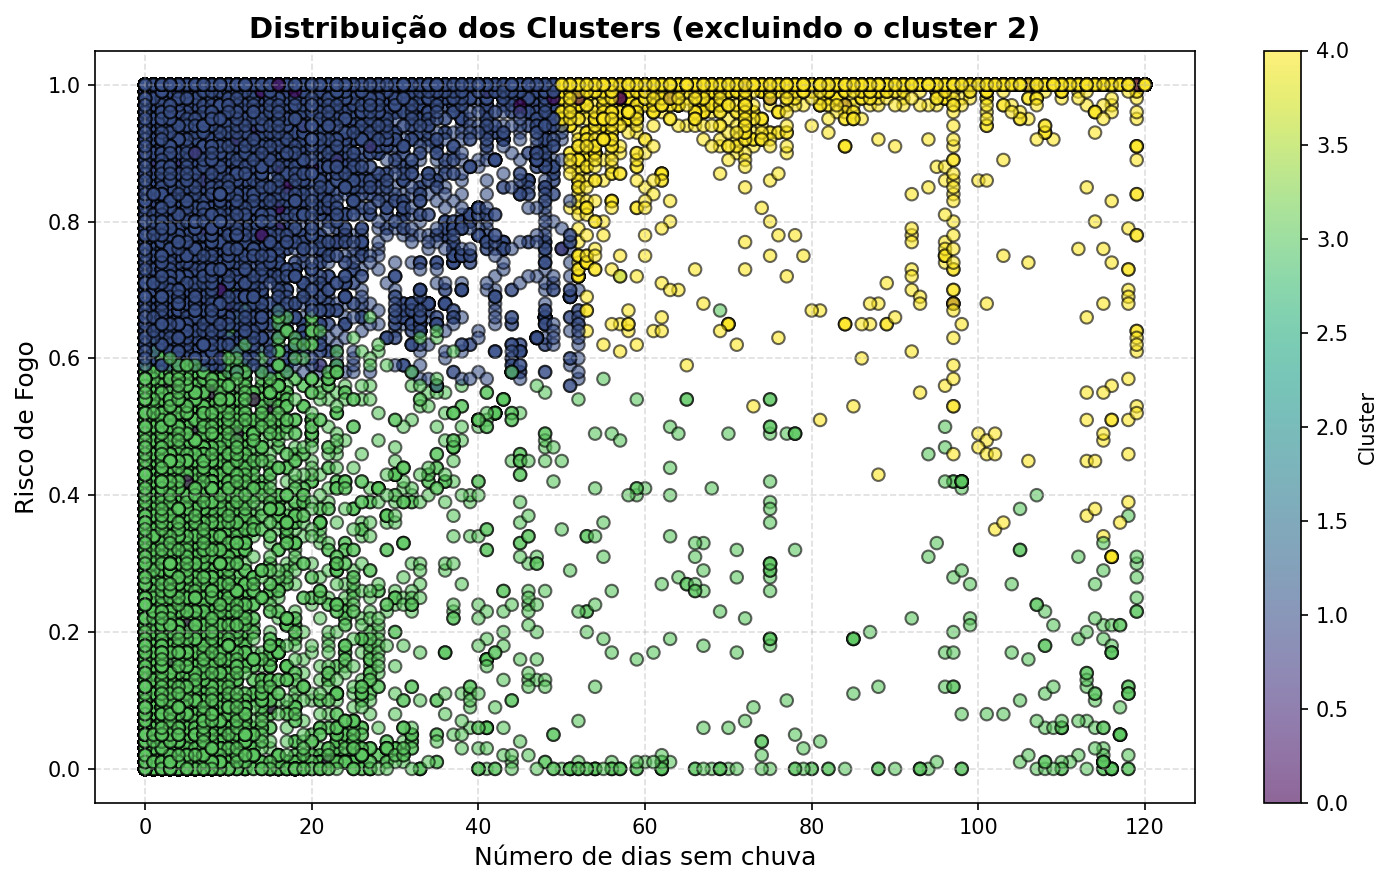

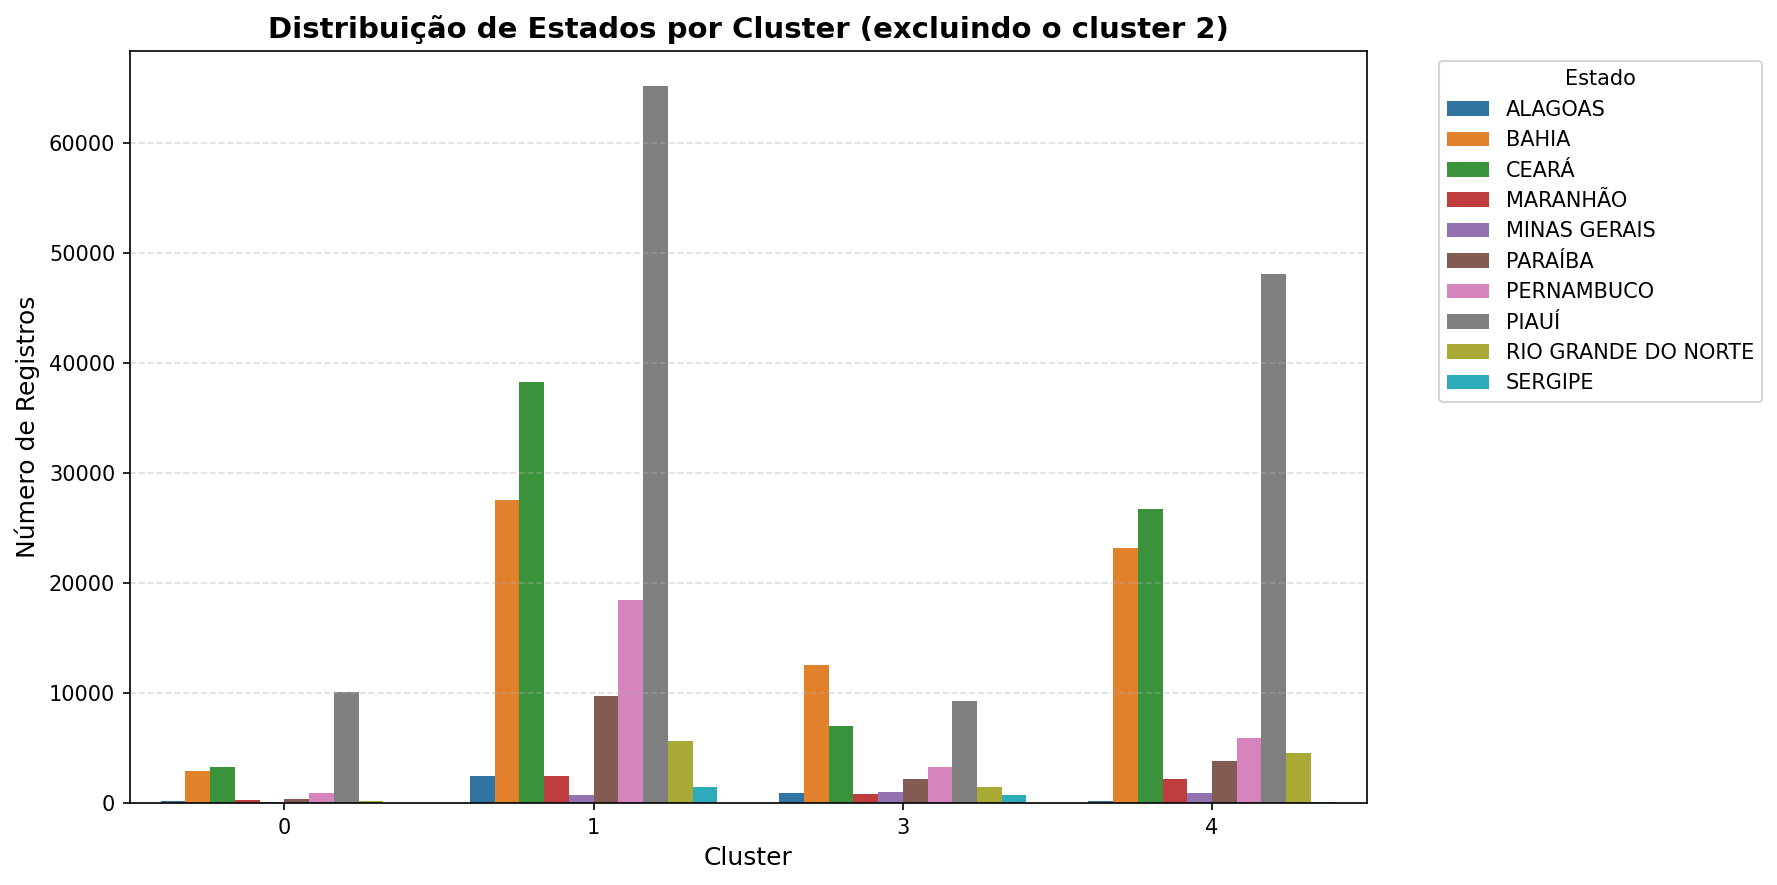


📌 Estatísticas - Cluster 0

  ▶ Estado: ALAGOAS
       numero_dias_sem_chuva  precipitacao  risco_fogo     frp
count                 198.00        198.00      198.00  198.00
mean                   11.66          0.57        1.00  120.83
std                     7.28          1.27        0.02   11.12
min                     0.00          0.00        0.83  106.10
25%                     7.25          0.00        1.00  113.22
50%                    11.00          0.00        1.00  118.10
75%                    15.00          0.30        1.00  124.50
max                    53.00          8.88        1.00  180.00

  ▶ Estado: BAHIA
       numero_dias_sem_chuva  precipitacao  risco_fogo      frp
count                2919.00       2919.00     2919.00  2919.00
mean                   53.84          0.06        0.98   199.71
std                    33.92          0.40        0.11   166.31
min                     0.00          0.00        0.00    98.10
25%                    25.00          0.00   

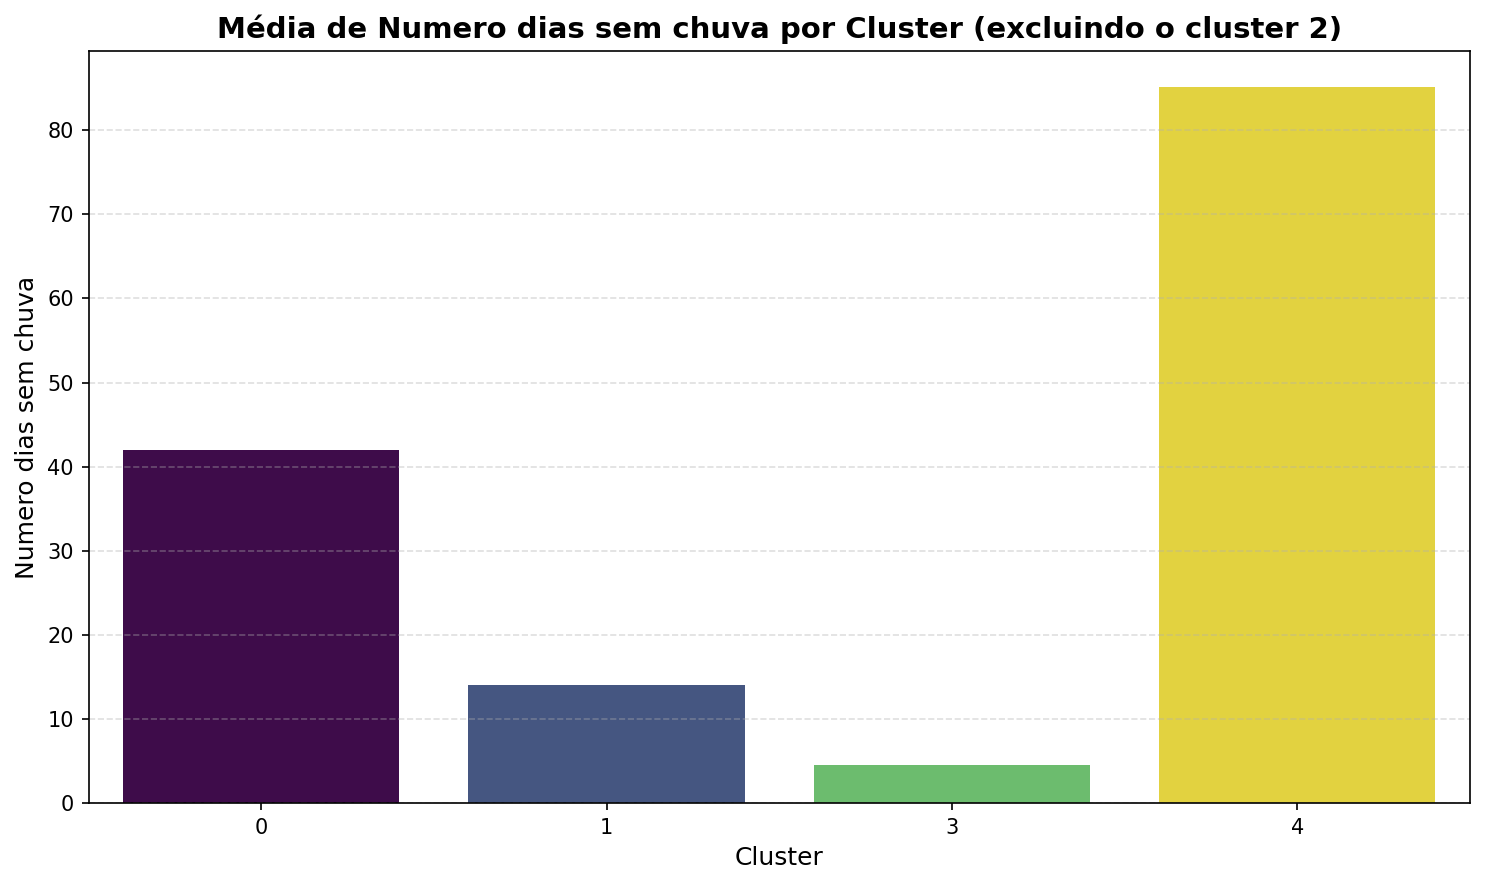

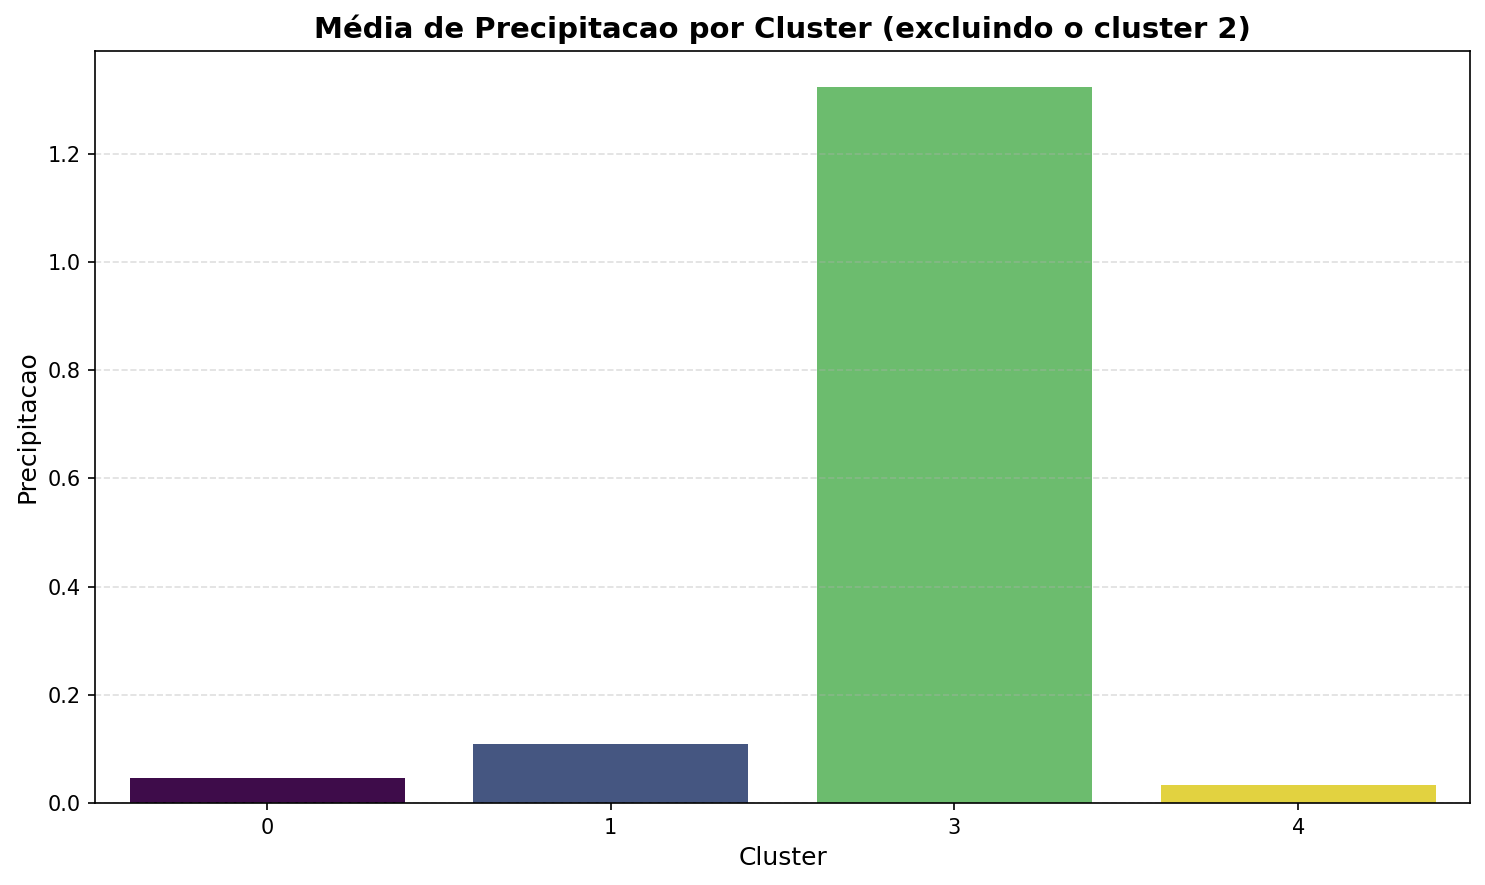

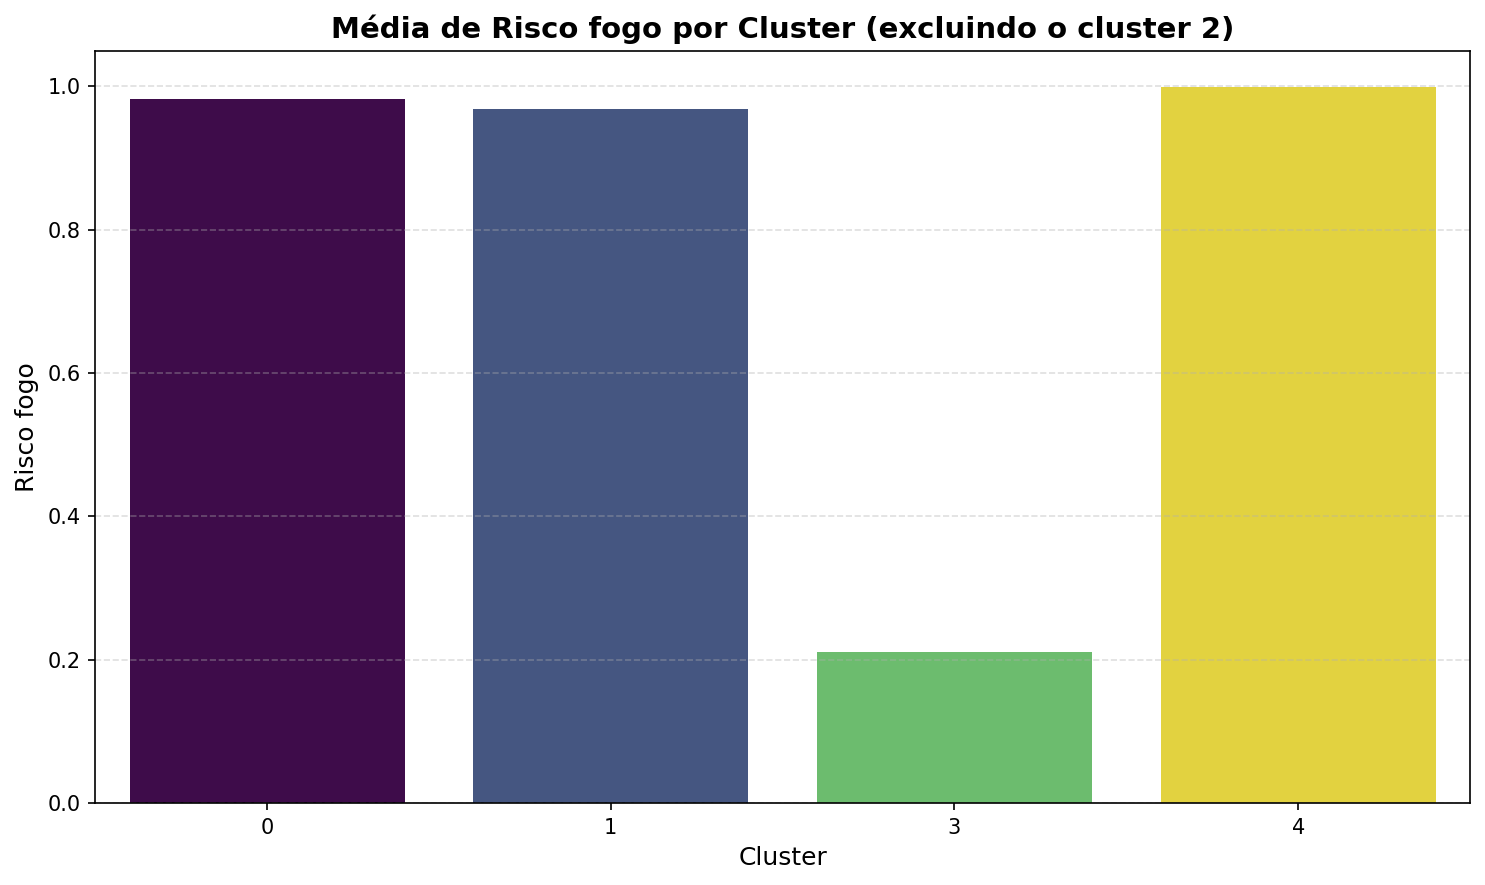

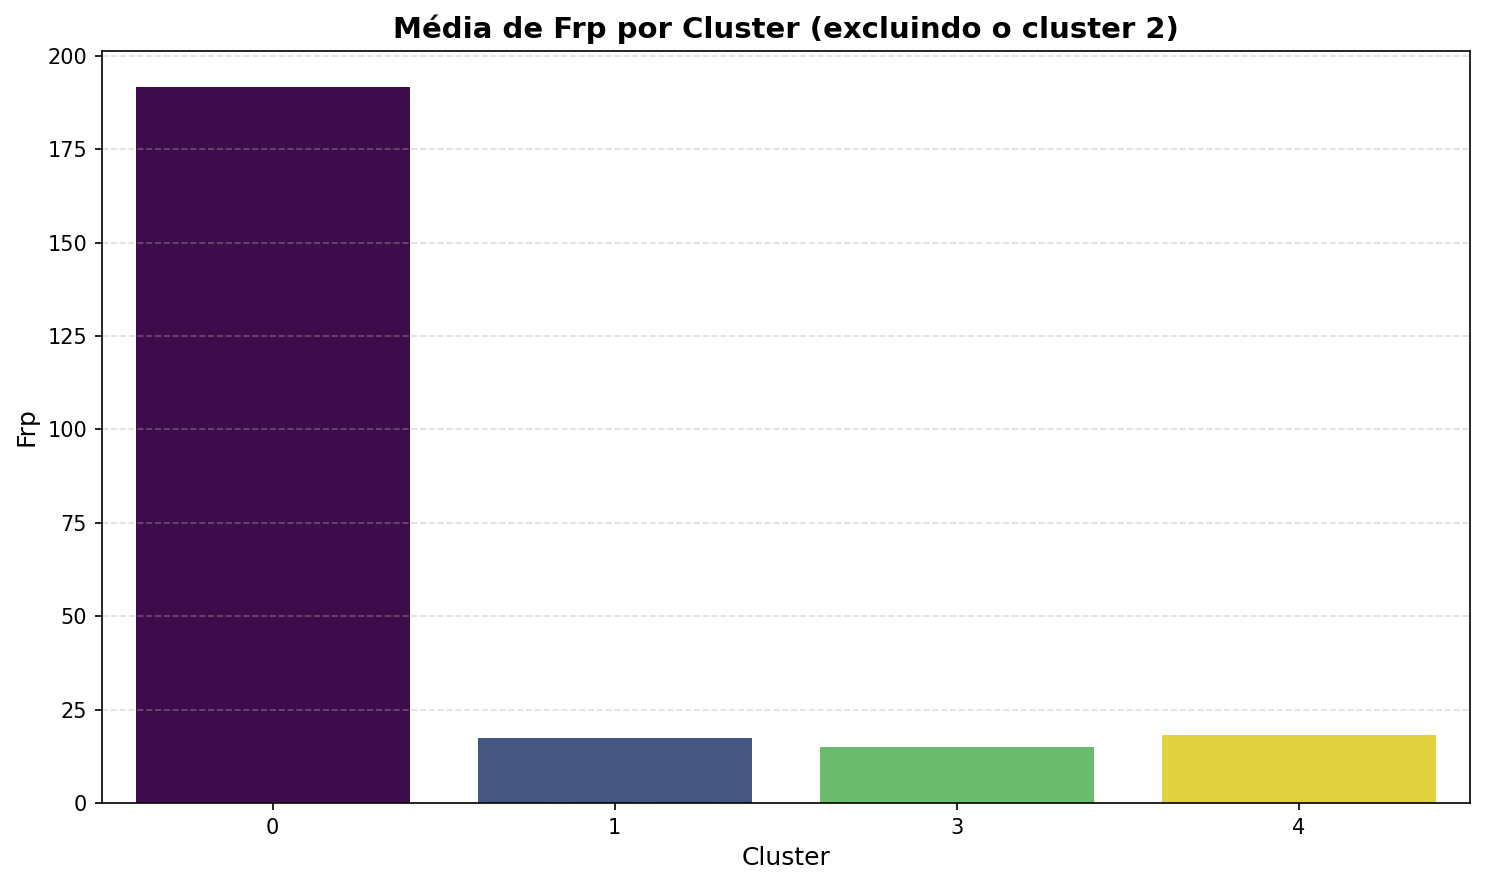

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar dados excluindo o cluster 2
df_filtrado = df[df['cluster'] != 2]

# 1. Análise descritiva da média por cluster
analise_clusters = df_filtrado.groupby('cluster')[['numero_dias_sem_chuva', 'precipitacao', 'risco_fogo', 'frp']].mean()
print("📊 Médias das variáveis em cada cluster (excluindo o cluster 2):")
print(analise_clusters.round(2))

# 2. Visualização da distribuição dos clusters (sem cluster 2)
plt.figure(figsize=(10, 6), dpi=150)
plt.scatter(
    df_filtrado['numero_dias_sem_chuva'],
    df_filtrado['risco_fogo'],
    c=df_filtrado['cluster'],
    cmap='viridis',
    edgecolor='k',
    alpha=0.6
)
plt.title('Distribuição dos Clusters (excluindo o cluster 2)', fontsize=14, weight='bold')
plt.xlabel('Número de dias sem chuva', fontsize=12)
plt.ylabel('Risco de Fogo', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.4)
plt.colorbar(label='Cluster')
plt.tight_layout()
plt.show()

# 3. Gráfico de contagem de estados por cluster (sem cluster 2)
plt.figure(figsize=(12, 6), dpi=150)
sns.countplot(x='cluster', hue='estado', data=df_filtrado, palette='tab10')
plt.title('Distribuição de Estados por Cluster (excluindo o cluster 2)', fontsize=14, weight='bold')
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Número de Registros', fontsize=12)
plt.legend(title='Estado', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

# 4. Estatísticas descritivas por cluster e estado (sem cluster 2)
for cluster in sorted(df_filtrado['cluster'].unique()):
    print(f"\n📌 Estatísticas - Cluster {cluster}")
    cluster_data = df_filtrado[df_filtrado['cluster'] == cluster]
    for estado in sorted(cluster_data['estado'].unique()):
        estado_data = cluster_data[cluster_data['estado'] == estado]
        print(f"\n  ▶ Estado: {estado}")
        print(estado_data[['numero_dias_sem_chuva', 'precipitacao', 'risco_fogo', 'frp']].describe().round(2))

# 5. Gráficos de médias por variável por cluster (sem cluster 2)
variaveis = ['numero_dias_sem_chuva', 'precipitacao', 'risco_fogo', 'frp']

for coluna in variaveis:
    plt.figure(figsize=(10, 6), dpi=150)
    sns.barplot(
        data=df_filtrado,
        x='cluster',
        y=coluna,
        hue='cluster',
        palette='viridis',
        legend=False,
        errorbar=None  # substitui ci=None
    )
    plt.title(f'Média de {coluna.replace("_", " ").capitalize()} por Cluster (excluindo o cluster 2)', fontsize=14, weight='bold')
    plt.xlabel('Cluster', fontsize=12)
    plt.ylabel(coluna.replace("_", " ").capitalize(), fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.4)
    plt.tight_layout()
    plt.show()

# Modelo preditivo

- decisões de projeto:
 - remover as colunas de satelite, precipitação, frp (como no projeto um user irá inserir as informações pro modelo não fazia sentido esperar que ele saiba dessas informações)

### Tratando os dados pro modelo

In [ ]:
df_preditivo = df.copy()
df_preditivo = df_preditivo.drop(columns=['municipio', 'cluster', 'satelite', 'frp', 'precipitacao'])

In [ ]:
df_preditivo['mes'] = df_preditivo['data_pas'].dt.month
df_preditivo['dia'] = df_preditivo['data_pas'].dt.day
df_preditivo['hora'] = df_preditivo['data_pas'].dt.hour
df_preditivo['dia_semana'] = df_preditivo['data_pas'].dt.dayofweek

df_preditivo = df_preditivo.drop(columns=['data_pas', 'ano_mes'])

df_preditivo.head()

latitude  longitude               estado  numero_dias_sem_chuva  \
0  -7.36323  -39.94515           PERNAMBUCO                      7   
1  -3.51178  -40.13655                CEARÁ                      3   
2  -5.47699  -36.43069  RIO GRANDE DO NORTE                      2   
3  -4.55109  -38.23961                CEARÁ                      4   
4  -6.05349  -39.49822                CEARÁ                      0   

   risco_fogo  mes  dia  hora  dia_semana  
0        0.54    1    2     4           1  
1        0.00    1    2     4           1  
2        0.11    1    2    12           1  
3        0.00    1    2    12           1  
4        0.02    1    2    12           1

In [ ]:
df_preditivo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346785 entries, 0 to 346784
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   latitude               346785 non-null  float64 
 1   longitude              346785 non-null  float64 
 2   estado                 346785 non-null  category
 3   numero_dias_sem_chuva  346785 non-null  uint8   
 4   risco_fogo             346785 non-null  float32 
 5   mes                    346785 non-null  int32   
 6   dia                    346785 non-null  int32   
 7   hora                   346785 non-null  int32   
 8   dia_semana             346785 non-null  int32   
dtypes: category(1), float32(1), float64(2), int32(4), uint8(1)
memory usage: 12.6 MB


In [ ]:
def faixa_dias_sem_chuva(dias):
  if dias <= 10:
    return '0-10'
  elif dias <= 20:
    return '11-20'
  elif dias <= 30:
    return '21-30'
  else:
    return '30+'
def periodo_do_dia(hora):
  if 5 <= hora < 12:
    return 'manha'
  elif 12 <= hora < 17:
    return 'tarde'
  elif 17 <= hora < 21:
    return 'noite'
  else:
    return 'madrugada'

In [ ]:
df_preditivo['risco_cat'] = df_preditivo['risco_fogo'].apply(lambda x: 1 if x > 0.5 else 0)
df_preditivo['faixa_dias_sem_chuva'] = df_preditivo['numero_dias_sem_chuva'].apply(faixa_dias_sem_chuva)
df_preditivo['periodo_dia'] = df_preditivo['hora'].apply(periodo_do_dia)

## Pipeline Normalizando e balanceando os dados

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler


le = LabelEncoder()
df_preditivo['risco_label'] = le.fit_transform(df_preditivo['risco_cat'])  # baixo=0, alto=1

X = df_preditivo.drop(columns=['risco_fogo', 'risco_cat', 'risco_label'])
y = df_preditivo['risco_label']

num_cols = ['latitude', 'longitude', 'numero_dias_sem_chuva', 'mes', 'dia', 'hora', 'dia_semana']
cat_cols = ['estado', 'faixa_dias_sem_chuva', 'periodo_dia']

# Pré-processador
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
])

pipe_desbalanceado = ImbPipeline(steps=[
    ('preprocess', preprocessor),
    ('clf', LogisticRegression(
        solver='saga',
        max_iter=1000,
        random_state=42
    ))
])

In [ ]:
df_preditivo.head()

latitude  longitude               estado  numero_dias_sem_chuva  \
0  -7.36323  -39.94515           PERNAMBUCO                      7   
1  -3.51178  -40.13655                CEARÁ                      3   
2  -5.47699  -36.43069  RIO GRANDE DO NORTE                      2   
3  -4.55109  -38.23961                CEARÁ                      4   
4  -6.05349  -39.49822                CEARÁ                      0   

   risco_fogo  mes  dia  hora  dia_semana  risco_cat faixa_dias_sem_chuva  \
0        0.54    1    2     4           1          1                 0-10   
1        0.00    1    2     4           1          0                 0-10   
2        0.11    1    2    12           1          0                 0-10   
3        0.00    1    2    12           1          0                 0-10   
4        0.02    1    2    12           1          0                 0-10   

  periodo_dia  risco_label  
0   madrugada            1  
1   madrugada            0  
2       tarde            0  
3       tarde            0  
4       tarde            0

## Divisao treino/teste

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}, y_test: {y_test.shape}")

X_train: (242749, 10), X_test: (104036, 10)
y_train: (242749,), y_test: (104036,)


## Treinando modelo

In [ ]:
from sklearn.metrics import classification_report

pipe_desbalanceado.fit(X_train, y_train)

y_pred = pipe_desbalanceado.predict(X_test)
report_desbalanceado = classification_report(y_test, y_pred)
print(report_desbalanceado)

              precision    recall  f1-score   support

           0       0.66      0.40      0.49     11152
           1       0.93      0.98      0.95     92884

    accuracy                           0.91    104036
   macro avg       0.79      0.69      0.72    104036
weighted avg       0.90      0.91      0.90    104036



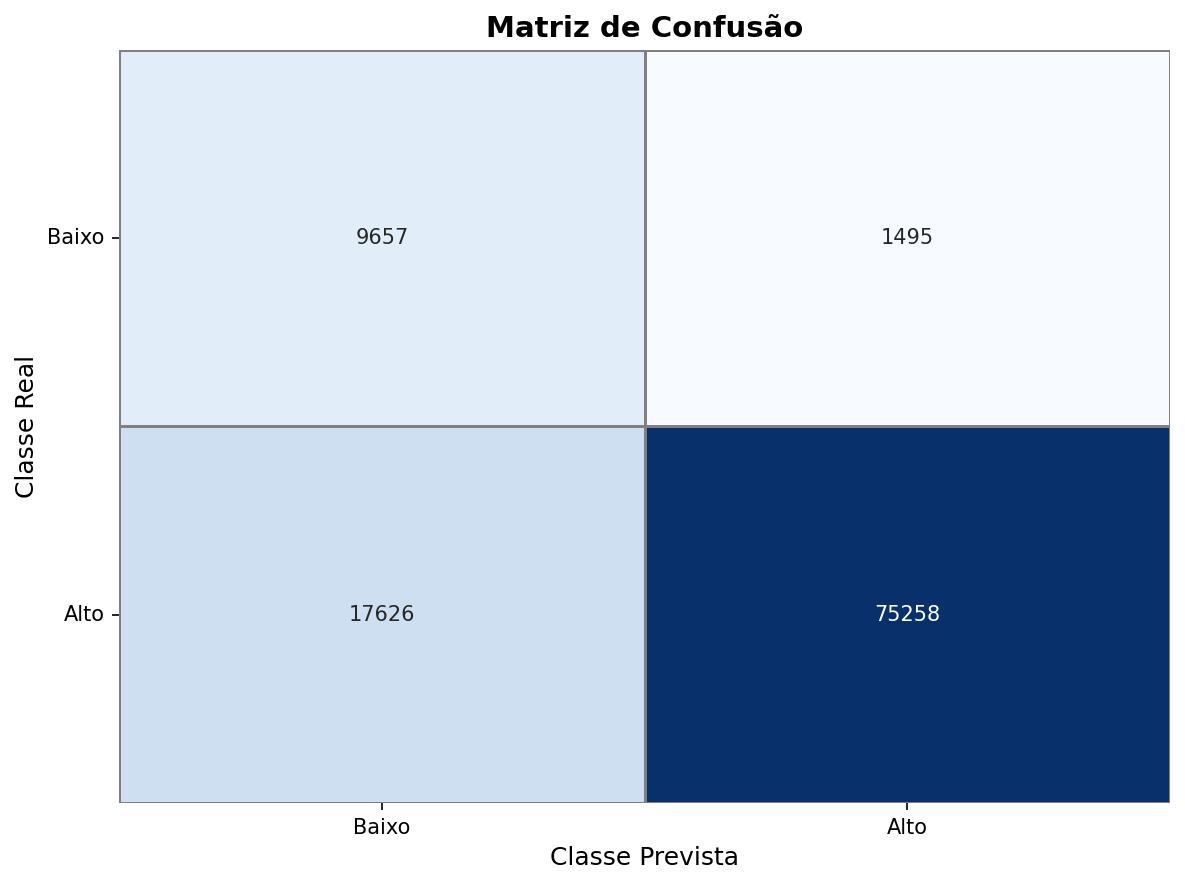

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Gerar matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Plotagem com melhorias visuais
plt.figure(figsize=(8, 6), dpi=150)
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    cbar=False,
    linewidths=0.5,
    linecolor='gray',
    xticklabels=['Baixo', 'Alto'],
    yticklabels=['Baixo', 'Alto']
)

# Rótulos e título
plt.xlabel('Classe Prevista', fontsize=12)
plt.ylabel('Classe Real', fontsize=12)
plt.title('Matriz de Confusão', fontsize=14, weight='bold')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Segundo modelo sem variavl de chuva

In [ ]:
X_no_days_no_rain = df_preditivo.drop(columns=['risco_fogo', 'risco_cat', 'risco_label', 'numero_dias_sem_chuva'])
y_no_days_no_rain = df_preditivo['risco_label'] # y continua o mesmo

# Atualizando as colunas numéricas para o pré-processador
num_cols_no_days_no_rain = ['latitude', 'longitude', 'mes', 'dia', 'hora', 'dia_semana']
cat_cols_no_days_no_rain = ['estado', 'periodo_dia']

# Pré-processador para o segundo modelo
preprocessor_no_days_no_rain = ColumnTransformer(transformers=[
    ('num', StandardScaler(), num_cols_no_days_no_rain),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols_no_days_no_rain)
])

# Pipeline para o segundo modelo
pipe_no_days_no_rain = ImbPipeline(steps=[
    ('preprocess', preprocessor_no_days_no_rain),
    ('clf', LogisticRegression(
        solver='saga',
        max_iter=1000,
        random_state=42
    ))
])

In [ ]:
X_train_no_days, X_test_no_days, y_train_no_days, y_test_no_days = train_test_split(
    X_no_days_no_rain, y_no_days_no_rain,
    test_size=0.3,
    random_state=42,
    stratify=y_no_days_no_rain
)

print("\nSegundo modelo (sem 'numero_dias_sem_chuva'):")
print(f"X_train: {X_train_no_days.shape}, X_test: {X_test_no_days.shape}")
print(f"y_train: {y_train_no_days.shape}, y_test: {y_test_no_days.shape}")


Segundo modelo (sem 'numero_dias_sem_chuva'):
X_train: (242749, 9), X_test: (104036, 9)
y_train: (242749,), y_test: (104036,)


In [ ]:
pipe_no_days_no_rain.fit(X_train_no_days, y_train_no_days)

# Avaliar o segundo modelo
y_pred_no_days = pipe_no_days_no_rain.predict(X_test_no_days)

print("\nRelatório de Classificação (segundo modelo):")
print(classification_report(y_test_no_days, y_pred_no_days))


Relatório de Classificação (segundo modelo):
              precision    recall  f1-score   support

           0       0.60      0.17      0.26     11152
           1       0.91      0.99      0.95     92884

    accuracy                           0.90    104036
   macro avg       0.75      0.58      0.60    104036
weighted avg       0.87      0.90      0.87    104036



Text(70.72222222222221, 0.5, 'Real')

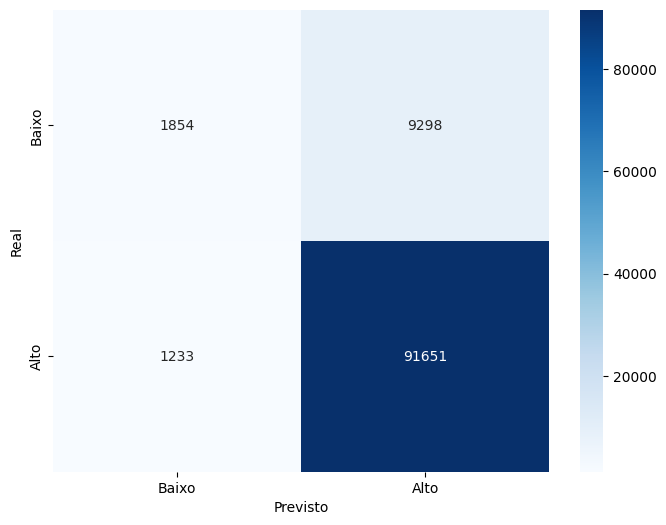

In [ ]:
# matriz de confusao
cm_no_days = confusion_matrix(y_test_no_days, y_pred_no_days)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_no_days, annot=True, fmt='d', cmap='Blues', xticklabels=['Baixo', 'Alto'], yticklabels=['Baixo', 'Alto'])
plt.xlabel('Previsto')
plt.ylabel('Real')

# Exportando os dois modelos

In [ ]:
import pickle

with open('modelo_sem_dias_sem_chuva.pkl', 'wb') as f:
  pickle.dump(pipe_no_days_no_rain, f)

with open('modelo_com_dias_sem_chuva.pkl', 'wb') as f:
  pickle.dump(pipe_desbalanceado, f)

# Avaliação Paiva (demora pra rodar, cuidado, nao precisa pra projetos)

## Escolhendo modelagem

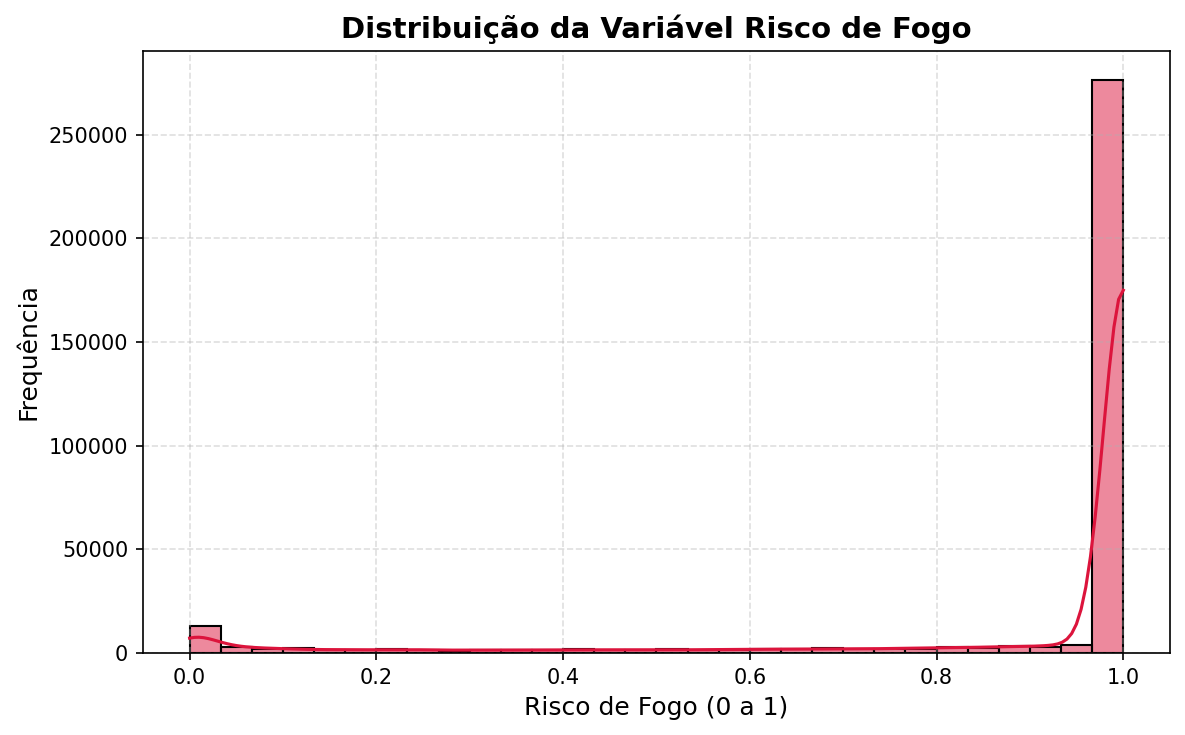

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5), dpi=150)
sns.histplot(
    data=df,
    x='risco_fogo',
    bins=30,
    kde=True,
    color='crimson',
    edgecolor='black'
)

plt.title('Distribuição da Variável Risco de Fogo', fontsize=14, weight='bold')
plt.xlabel('Risco de Fogo (0 a 1)', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

Categorizando classes pro modelo

valores acima de 0,5:  309611
valores abaixo de 0,5:  37174


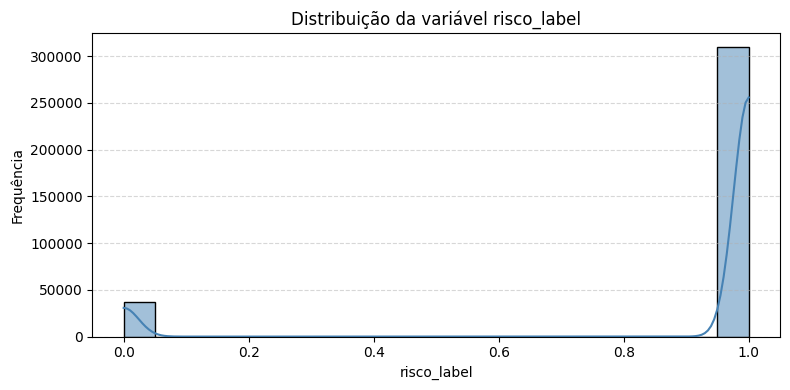

In [ ]:
acima_meio = df[df['risco_fogo'] > 0.5]
abaixo_meio = df[df['risco_fogo'] <= 0.5]

print('valores acima de 0,5: ', acima_meio['risco_fogo'].count())
print('valores abaixo de 0,5: ', abaixo_meio['risco_fogo'].count())

plt.figure(figsize=(8, 4))
sns.histplot(df_preditivo['risco_label'], kde=True, color='steelblue')
plt.title('Distribuição da variável risco_label')
plt.xlabel('risco_label')
plt.ylabel('Frequência')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


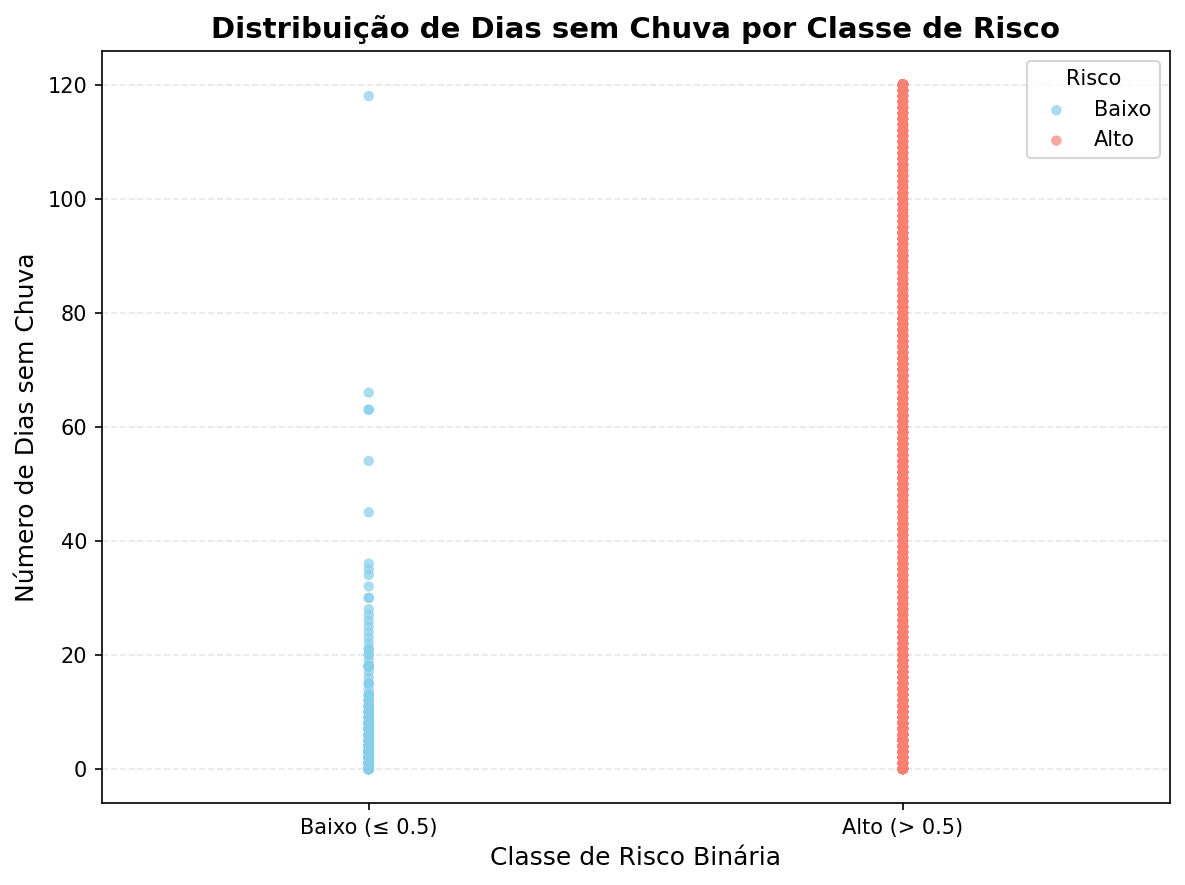

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Stripplot com amostragem e ajustes visuais
plt.figure(figsize=(8, 6), dpi=150)
sns.stripplot(
    data=df_preditivo.sample(5000, random_state=42),
    x='risco_label',
    y='numero_dias_sem_chuva',
    hue='risco_label',
    palette={0: 'skyblue', 1: 'salmon'},
    jitter=False,
    alpha=0.7,
    dodge=False
)

# Rótulos e ajustes
plt.xticks([0, 1], ['Baixo (≤ 0.5)', 'Alto (> 0.5)'])
plt.xlabel('Classe de Risco Binária', fontsize=12)
plt.ylabel('Número de Dias sem Chuva', fontsize=12)
plt.title('Distribuição de Dias sem Chuva por Classe de Risco', fontsize=14, weight='bold')
plt.legend(title='Risco', labels=['Baixo', 'Alto'], loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

## 30 simulações - demora pra rodar, comente esse codigo pra projetos

In [ ]:
pipeline_balanceado = ImbPipeline(steps=[
    ('preprocess', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('clf', LogisticRegression(
        solver='saga',
        max_iter=1000,
        random_state=42
    ))
])
pipeline_balanceado.fit(X_train, y_train)

y_pred = pipeline_balanceado.predict(X_test)

In [ ]:
print('modelo balanceado:')
print(classification_report(y_test, y_pred))
print('-'*10)
print('modelo desbalanceado:')
print(report_desbalanceado)

modelo balanceado:
              precision    recall  f1-score   support

           0       0.35      0.87      0.50     11152
           1       0.98      0.81      0.89     92884

    accuracy                           0.82    104036
   macro avg       0.67      0.84      0.69    104036
weighted avg       0.91      0.82      0.85    104036

----------
modelo desbalanceado:
              precision    recall  f1-score   support

           0       0.66      0.40      0.49     11152
           1       0.93      0.98      0.95     92884

    accuracy                           0.91    104036
   macro avg       0.79      0.69      0.72    104036
weighted avg       0.90      0.91      0.90    104036



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

def simular_pipeline(pipe, X, y, n_simulacoes=30):
    resultados = []
    for i in range(n_simulacoes):
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.3, stratify=y, random_state=i
        )

        pipe.fit(X_train, y_train)
        y_pred = pipe.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)

        res = {
            'sim': i + 1,
            'accuracy': acc,
            'precision': report['1']['precision'],
            'recall': report['1']['recall'],
            'f1-score': report['1']['f1-score']
        }

        resultados.append(res)

        print(f"Simulação {i+1:02d} | "
              f"Acc: {res['accuracy']:.4f} | "
              f"Prec: {res['precision']:.4f} | "
              f"Recall: {res['recall']:.4f} | "
              f"F1: {res['f1-score']:.4f}")

    return pd.DataFrame(resultados)

# print("Simulando pipeline DESBALANCEADO...")
# resultados_desbalanceado = simular_pipeline(pipe_desbalanceado, X, y)

# print("Simulando pipeline BALANCEADO (SMOTE)...")
# resultados_balanceado = simular_pipeline(pipeline_balanceado, X, y)

# # -----------------------
# # Comparação dos resultados
# # -----------------------
# print("\nMÉDIA DOS RESULTADOS (Desbalanceado):")
# print(resultados_desbalanceado.mean())

# print("\nMÉDIA DOS RESULTADOS (Balanceado com SMOTE):")
# print(resultados_balanceado.mean())


### Analisando simulações

Definição das métricas:
- Acurácia
  - utilizada para medir a proporção de dados previstos corretamente pelo modelo em relação ao total dos dados
- Precisão
  - Mede a proporção de dados classificados como positivos que são realmente positivos
- Recall
  - taxa de verdadeiros positivos
- F1 score:
  - representa um equilíbrio entre a precisão e o recall

In [ ]:
#pegando de um txt as saidas pra nao rodar de novo
import re

with open('/content/drive/Shareddrives/Sentinela - Projetos 5/Dados + analises/simulacoes_paiva.txt', 'r') as file:
  lines = file.readlines()

def extrair_metricas(linhas, modelo_nome):
    dados = []
    for linha in linhas:
        match = re.search(r'Simulação (\d+).*Acc: ([0-9.]+).*Prec: ([0-9.]+).*Recall: ([0-9.]+).*F1: ([0-9.]+)', linha)
        if match:
            sim, acc, prec, recall, f1 = match.groups()
            dados.append({
                'sim': int(sim),
                'accuracy': float(acc),
                'precision': float(prec),
                'recall': float(recall),
                'f1-score': float(f1),
                'modelo': modelo_nome
            })
    return dados

# Divide os blocos de texto por modelo
idx_bal = next(i for i, l in enumerate(lines) if 'Simulando pipeline BALANCEADO' in l)

# Extrai as métricas
dados_desbalanceado = extrair_metricas(lines[0:idx_bal], 'Desbalanceado')
dados_balanceado = extrair_metricas(lines[idx_bal:], 'Balanceado SMOTE')

# Junta tudo num DataFrame
df_resultados = pd.DataFrame(dados_desbalanceado + dados_balanceado)

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/Shareddrives/Sentinela - Projetos 5/Dados + analises/simulacoes_paiva.txt'

In [ ]:
df_resultados.sample(n=3, ignore_index=True)

In [ ]:
plt.figure(figsize=(16, 10))
sns.set(style="whitegrid")

# Gráfico F1-score
plt.subplot(2, 2, 1)
sns.boxplot(data=df_resultados, x='modelo', y='f1-score', palette='Set2', hue='modelo')
plt.title('F1-score por Modelo')

# Gráfico Accuracy
plt.subplot(2, 2, 2)
sns.boxplot(data=df_resultados, x='modelo', y='accuracy', palette='Set2', hue='modelo')
plt.title('Accuracy por Modelo')

# Gráfico Recall
plt.subplot(2, 2, 3)
sns.boxplot(data=df_resultados, x='modelo', y='recall', palette='Set2', hue='modelo')
plt.title('Recall por Modelo')

# Gráfico Precision
plt.subplot(2, 2, 4)
sns.boxplot(data=df_resultados, x='modelo', y='precision', palette='Set2', hue='modelo')
plt.title('Precision por Modelo')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, auc

# Scores dos modelos
y_score_desb = pipe_desbalanceado.predict_proba(X_test)[:, 1]
y_score_bal = pipeline_balanceado.predict_proba(X_test)[:, 1]

# Curva ROC para cada modelo
fpr_desb, tpr_desb, _ = roc_curve(y_test, y_score_desb)
roc_auc_desb = auc(fpr_desb, tpr_desb)

fpr_bal, tpr_bal, _ = roc_curve(y_test, y_score_bal)
roc_auc_bal = auc(fpr_bal, tpr_bal)

# Plotando as duas curvas ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_desb, tpr_desb, color='darkorange', lw=2, label=f'Desbalanceado (AUC = {roc_auc_desb:.3f})')
plt.plot(fpr_bal, tpr_bal, color='green', lw=2, label=f'Balanceado SMOTE (AUC = {roc_auc_bal:.3f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

# Ajustes visuais
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - Comparação entre Modelos')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
sns.set(style='whitegrid', font_scale=1.2)
plt.figure(figsize=(18, 12))

# Lista de métricas
metricas = ['accuracy', 'precision', 'recall', 'f1-score']

# Loop para criar um gráfico por métrica
for i, metrica in enumerate(metricas, 1):
    plt.subplot(2, 2, i)
    sns.lineplot(
        data=df_resultados,
        x='sim',
        y=metrica,
        hue='modelo',
        marker='o'
    )
    plt.title(f'{metrica.capitalize()} por Simulação')
    plt.xlabel('Simulação')
    plt.ylabel(metrica.capitalize())
    plt.legend(title='Modelo')
    plt.ylim(0.8, 0.99)
    plt.grid(True)

plt.tight_layout()
plt.show()

## Teste Estatistico

In [ ]:
from scipy.stats import shapiro

for met in metricas:
    diffs = (
        df_resultados[df_resultados['modelo']=='Desbalanceado'][met].values
        -
        df_resultados[df_resultados['modelo']=='Balanceado SMOTE'][met].values
    )
    stat, p = shapiro(diffs)
    print(f"{met}: W={stat:.3f}, p={p:.3f} -> ",
          "Normal" if p>0.05 else "Não normal")
print('''Isso indica que não há evidências estatísticas para rejeitar a hipótese
de normalidade das diferenças. Como provability > 0.05, podemos concluir que as
diferenças entre os modelos balanceados e desbalanceados apresentam uma distribuição normal. Então o teste t pareado se encaixa nessa situação.''')

In [ ]:
from scipy.stats import ttest_rel

df_desbal = df_resultados[df_resultados['modelo'] == 'Desbalanceado']
df_bal = df_resultados[df_resultados['modelo'] == 'Balanceado SMOTE']

# Inicializa dicionário para armazenar resultados
resultados_tteste = {}

# Para cada métrica
metricas = ['accuracy', 'precision', 'recall', 'f1-score']
for metrica in metricas:
    stat, p = ttest_rel(df_desbal[metrica].values, df_bal[metrica].values)
    resultados_tteste[metrica] = {'t': stat, 'p': p}

# imprimir resultados

for metrica, resultados in resultados_tteste.items():
    print(f"{metrica.capitalize()}: t={resultados['t']:.3f}, p={resultados['p']:.2e}")

In [ ]:
from scipy.stats import wilcoxon

# Separar os dados

# Teste de Wilcoxon para cada métrica
metricas = ['accuracy', 'precision', 'recall', 'f1-score']
resultados_wilcoxon = {}

for metrica in metricas:
    stat, p = wilcoxon(df_desbal[metrica].values, df_bal[metrica].values)
    resultados_wilcoxon[metrica] = {'stat': stat, 'p': p}
    print(f"{metrica.capitalize()}: W={stat:.3f}, p={p:.3e}")

### Conclusoes testes

1. Verificação da Normalidade das Diferenças (Shapiro–Wilk)
- Antes de escolher o teste estatístico para comparar dois modelos pareados, verificamos se a distribuição das diferenças entre as suas métricas segue, ou não, uma forma aproximadamente normal. Pois se quisermos usar o teste t pareado ele requer isso.
- em todos os casos P > 0,05, o que significa que não há evidência estatística contra a hipótese nula de que as diferenças das métricas provêm de uma distribuição normal.
2. Comparação Paramétrica: Teste t Pareado
- Com a normalidade das diferenças confirmada, aplicamos o teste t pareado para quantificar se a média das diferenças  é estatisticamente diferente de zero. Em outras palavras, queremos saber se, no conjunto de 30 simulações, há um desvio consistente entre as métricas dos dois modelos.
- todos os p‑valores são virtualmente zero, mostrando que as médias das métricas diferem de forma estatisticamente robusta.
  - hipotese nula: afirma que a média das diferenças entre os pares de observações é igual a zero, no nosso teste temos evidencias suficientes para dispensa-la
3. Comparação Não Paramétrica: Teste de Wilcoxon Signed‑Rank
- também fizemos esse teste para afirmar a robustez das conclusões
- H nula: A mediana das diferenças pareadas entre os dois grupos é igual a zero.
- como os p-valores estão muito próximo de 0, temos  os modelos diferem estatisticamente mesmo ao nível da mediana.

In [ ]:
df_preditivo.shape